##### Main plot

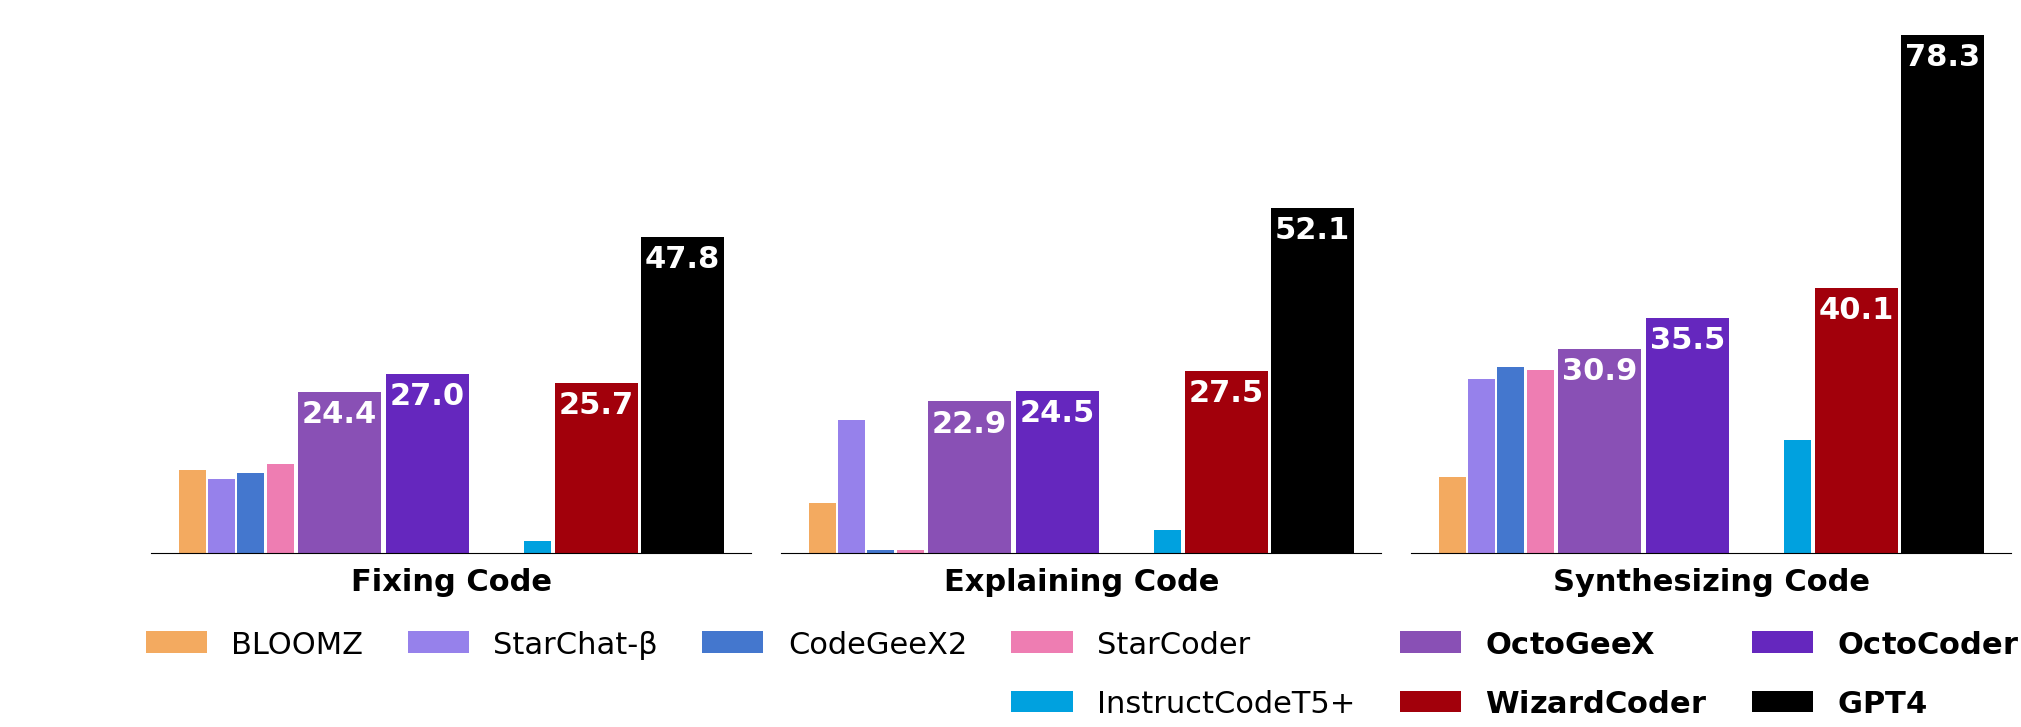

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


FONTSIZE = 22
MODEL_TO_COLOR = {
    'GPT4': '#000000',
    'WizardCoder': '#A2000B', # From Wiz avatar
    'OctoCoder': '#6527BE',#'#35155D',#'#6527BE',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    'OctoGeeX': '#8950B5',#512B81',#'#A084E8',
    'StarCoder': '#EE7DB2',
    'CodeGeeX2': '#4477CE',#blue',
    'StarChat-β': '#9681EB',
    'BLOOMZ': '#F3AA60',
    'InstructCodeT5+': '#00A1DF', # Salesforce logo
}

gpt_4_scores = [47.8, 52.1, 78.3]
wizard_scores = [25.7, 27.5, 40.1]
octocoder_scores = [27.0, 24.5, 35.5]
octogeex_scores = [24.4, 22.9, 30.9]
codegeex2_scores = [12.1, 0.5, 28.1]
starchatbeta_scores = [11.2, 20.1, 26.3]
instructcodet5p_scores = [1.8, 3.5, 17.1]
starcoder_scores = [13.4, 0.5, 27.6] # 20.4
bloomz_scores = [12.5, 7.5, 11.5]

MODEL_TO_RES = {
    "BLOOMZ": bloomz_scores,
    "StarChat-β": starchatbeta_scores,
    "CodeGeeX2": codegeex2_scores,
    "StarCoder": starcoder_scores,
    "OctoGeeX": octogeex_scores,
    "OctoCoder": octocoder_scores,
    "InstructCodeT5+": instructcodet5p_scores,
    "WizardCoder": wizard_scores,
    "GPT4": gpt_4_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Fixing Code",
    1: "Explaining Code",
    2: "Synthesizing Code",
}

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', edgecolor='k', ncols=3, nrows=1, sharey=True)

#jitter = [-0.5, -0.3, -0.1, 0.1, 0.4, 0.6]
jitter = [-0.5, -0.44, -0.38, -0.32, -0.26, -0.14, 0.04, 0.325, 0.5]
jitter = [-0.5, -0.44, -0.38, -0.32, -0.20, -0.02, 0.205, 0.325, 0.5]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        width = 0.17 if model_name in ["OctoGeeX", "OctoCoder", "WizardCoder", "GPT4"] else 0.055
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=width,#0.195,
            #label=model_name,
            label="$\\bf{" + model_name + "}$" if model_name in ["OctoGeeX", "OctoCoder", "WizardCoder", "GPT4"] else model_name,
            color=MODEL_TO_COLOR[model_name],
            #edgecolor=MODEL_TO_COLOR[model_name],
            #fill=False,
            #linewidth=4,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)
        axes[bar_idx].spines['left'].set_visible(False)
        axes[bar_idx].get_yaxis().set_ticks([])

        if model_res[bar_idx] > 10:
            if model_name in ["OctoGeeX", "OctoCoder", "WizardCoder", "GPT4"]:
                axes[bar_idx].bar_label(bars, fontweight="bold", fontsize=FONTSIZE, color="white", fmt="%.1f", padding=-26)
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)



axes[bar_idx].plot([], [], color="white", label=" ")
axes[bar_idx].plot([], [], color="white", label="  ")
axes[bar_idx].plot([], [], color="white", label="   ")
handles, labels = axes[bar_idx].get_legend_handles_labels()

# Reorder

order = [
    "BLOOMZ",
    " ",
    'StarChat-β',
    " ",
    'CodeGeeX2',
    " ",
    'StarCoder',
    'InstructCodeT5+',
    '$\\bf{OctoGeeX}$',
    '$\\bf{WizardCoder}$',
    '$\\bf{OctoCoder}$',
    "$\\bf{GPT4}$",
 ]


handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        #if l == "Data-constrained scaling laws efficient frontier":
        #    to_map = h
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

legend = fig.legend(
    handles,
    labels,
    loc=(0.0661,-0.005),#"lower center",#(0,-0.3),
    ncol=6,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=1.45,
    labelspacing=1,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#shift = max([t.get_window_extent().width for t in legend.get_texts()])
#for t in legend.get_texts():
#    t.set_ha('right') # ha is alias for horizontalalignment
#    t.set_position((shift,0))

#axes[0].set_xlim((-0.60175, 0.65475))
#axes[0].axis('tight')

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
plt.subplots_adjust(wspace=0.05, bottom=0.2)

plt.savefig('main.pdf', dpi=300, bbox_inches='tight')
plt.savefig('main.png', dpi=300, bbox_inches='tight')
plt.savefig('main.svg', dpi=300, bbox_inches='tight')


###### OLD

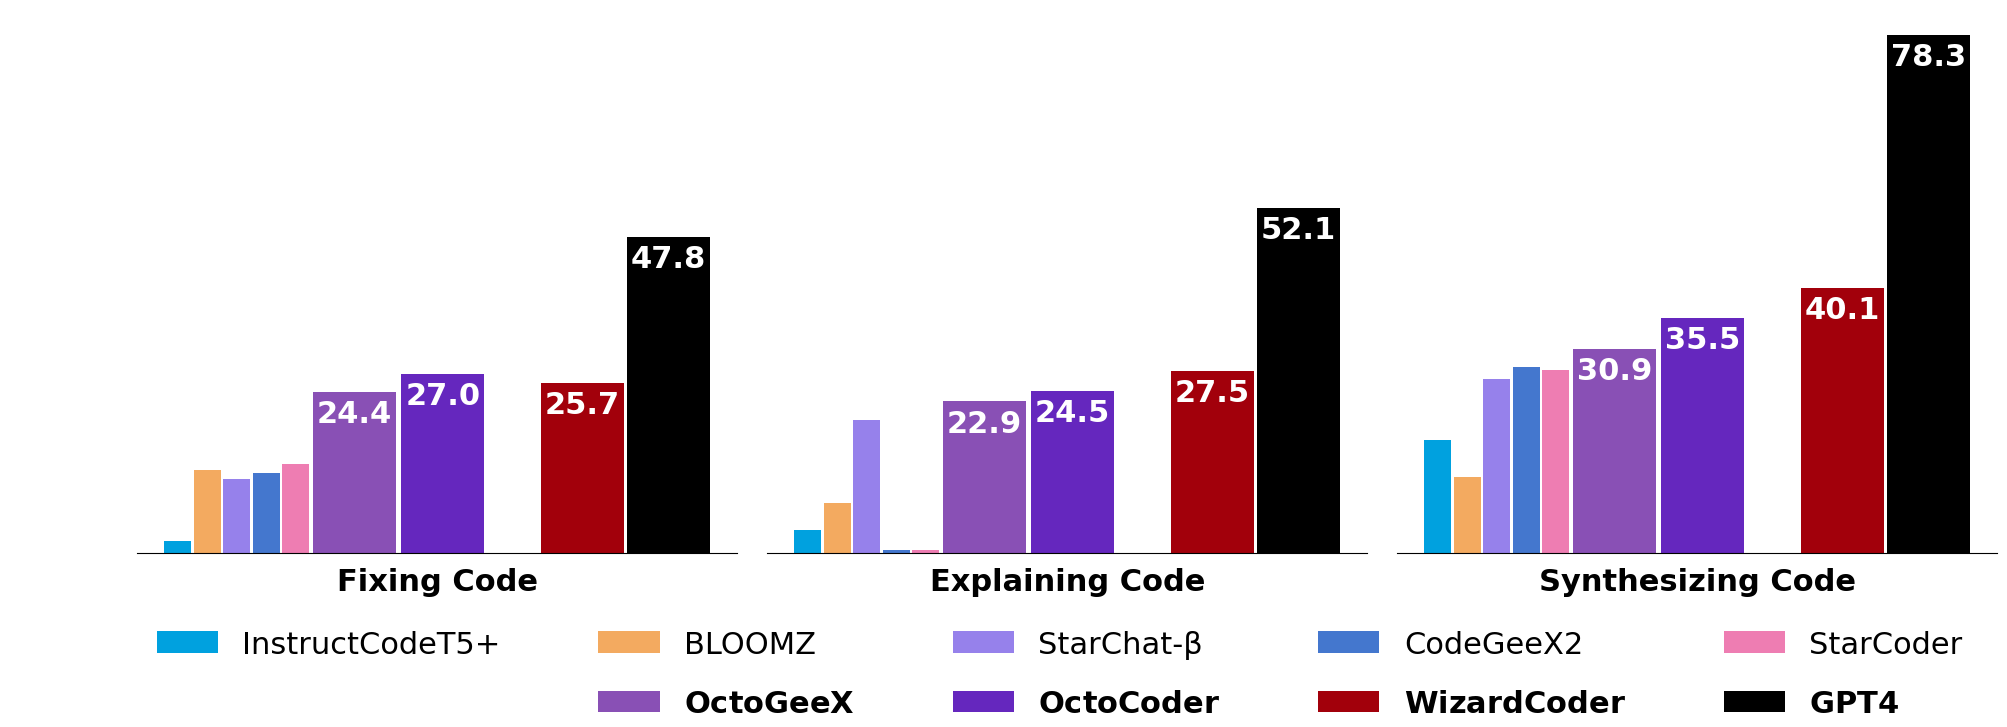

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


FONTSIZE = 22
MODEL_TO_COLOR = {
    'GPT4': '#000000',
    'WizardCoder': '#A2000B', # From Wiz avatar
    'OctoCoder': '#6527BE',#'#35155D',#'#6527BE',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    'OctoGeeX': '#8950B5',#512B81',#'#A084E8',
    'StarCoder': '#EE7DB2',
    'CodeGeeX2': '#4477CE',#blue',
    'StarChat-β': '#9681EB',
    'BLOOMZ': '#F3AA60',
    'InstructCodeT5+': '#00A1DF', # Salesforce logo
}

gpt_4_scores = [47.8, 52.1, 78.3]
wizard_scores = [25.7, 27.5, 40.1]
octocoder_scores = [27.0, 24.5, 35.5]
octogeex_scores = [24.4, 22.9, 30.9]
codegeex2_scores = [12.1, 0.5, 28.1]
starchatbeta_scores = [11.2, 20.1, 26.3]
instructcodet5p_scores = [1.8, 3.5, 17.1]
starcoder_scores = [13.4, 0.5, 27.6] # 20.4
bloomz_scores = [12.5, 7.5, 11.5]

MODEL_TO_RES = {
    "InstructCodeT5+": instructcodet5p_scores,
    "BLOOMZ": bloomz_scores,
    "StarChat-β": starchatbeta_scores,
    "CodeGeeX2": codegeex2_scores,
    "StarCoder": starcoder_scores,
    "OctoGeeX": octogeex_scores,
    "OctoCoder": octocoder_scores,
    "WizardCoder": wizard_scores,
    "GPT4": gpt_4_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Fixing Code",
    1: "Explaining Code",
    2: "Synthesizing Code",
}

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', edgecolor='k', ncols=3, nrows=1, sharey=True)


#jitter = [-0.5, -0.3, -0.1, 0.1, 0.4, 0.6]
jitter = [-0.5, -0.44, -0.38, -0.32, -0.26, -0.14, 0.04, 0.325, 0.5]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        width = 0.17 if i > 4 else 0.055
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=width,#0.195,
            #label=model_name,
            label="$\\bf{" + model_name + "}$" if model_name in ["OctoGeeX", "OctoCoder", "WizardCoder", "GPT4"] else model_name,
            color=MODEL_TO_COLOR[model_name],
            #edgecolor=MODEL_TO_COLOR[model_name],
            #fill=False,
            #linewidth=4,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)
        axes[bar_idx].spines['left'].set_visible(False)
        axes[bar_idx].get_yaxis().set_ticks([])

        if model_res[bar_idx] > 10:
            if i > 4:
                axes[bar_idx].bar_label(bars, fontweight="bold", fontsize=FONTSIZE, color="white", fmt="%.1f", padding=-26)
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)



axes[bar_idx].plot([], [], color="white", label=" ")
axes[bar_idx].plot([], [], color="white", label="  ")
axes[bar_idx].plot([], [], color="white", label="   ")
handles, labels = axes[bar_idx].get_legend_handles_labels()

# Reorder

order = [
    'InstructCodeT5+',
    ' ',
     "BLOOMZ",
    '$\\bf{OctoGeeX}$',
    'StarChat-β',
    '$\\bf{OctoCoder}$',
    'CodeGeeX2',
    '$\\bf{WizardCoder}$',
    'StarCoder',
    "$\\bf{GPT4}$",
 ]


handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        #if l == "Data-constrained scaling laws efficient frontier":
        #    to_map = h
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

legend = fig.legend(
    handles,
    labels,
    loc=(0.072,-0.005),#"lower center",#(0,-0.3),
    ncol=5,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=3.2,
    labelspacing=1,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#shift = max([t.get_window_extent().width for t in legend.get_texts()])
#for t in legend.get_texts():
#    t.set_ha('right') # ha is alias for horizontalalignment
#    t.set_position((shift,0))

#axes[0].set_xlim((-0.60175, 0.65475))
#axes[0].axis('tight')

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
plt.subplots_adjust(wspace=0.05, bottom=0.2)

plt.savefig('humaneval.pdf', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.png', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.svg', dpi=300, bbox_inches='tight')


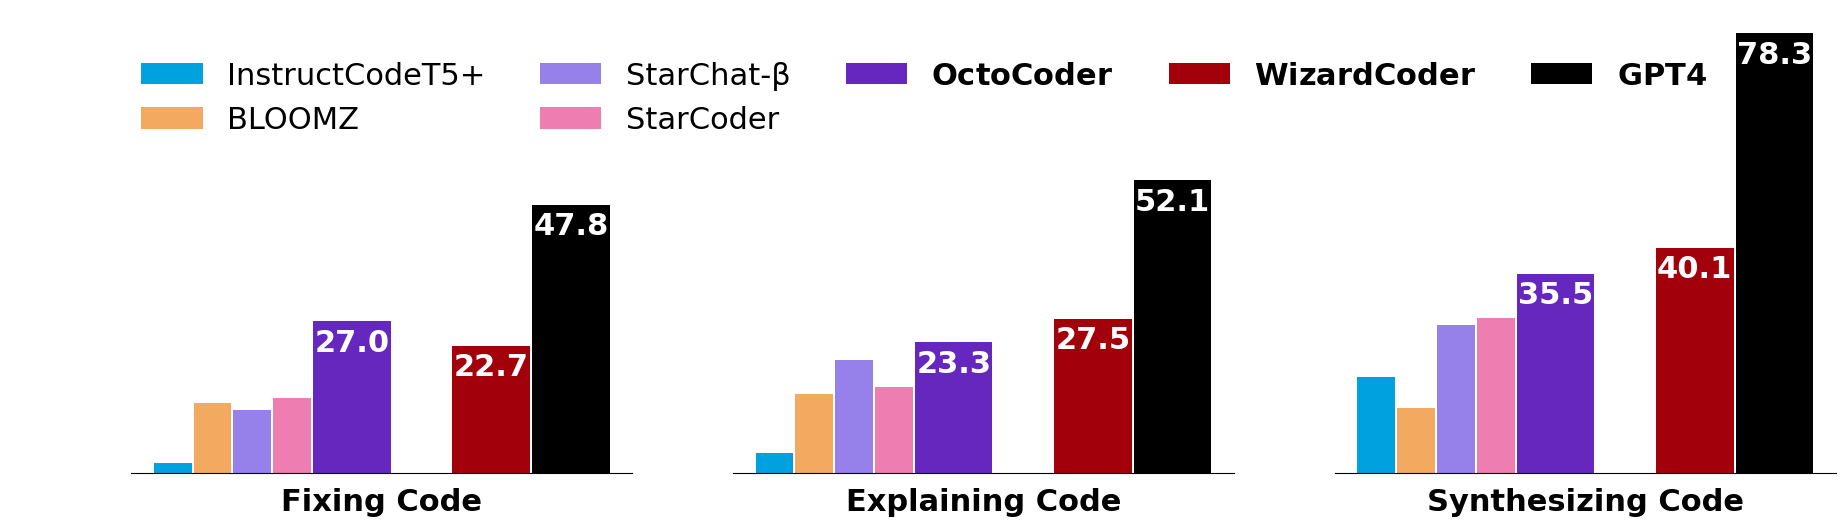

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


FONTSIZE = 22
MODEL_TO_COLOR = {
    'GPT4': '#000000',
    'WizardCoder': '#A2000B', # From Wiz avatar
    'OctoCoder': '#6527BE',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    'StarCoder': '#EE7DB2',
    'StarChat-β': '#9681EB',
    'BLOOMZ': '#F3AA60',
    'InstructCodeT5+': '#00A1DF', # Salesforce logo
}

gpt_4_scores = [47.8, 52.1, 78.3]
wizard_scores = [22.7, 27.5, 40.1]
us_scores = [27.0, 23.3, 35.5]
starchatbeta_scores = [11.2, 20.1, 26.3]
instructcodet5p_scores = [1.8, 3.5, 17.1]
starcoder_scores = [13.4, 20.4, 27.6]
bloomz_scores = [12.5, 14, 11.5]

MODEL_TO_RES = {
    "InstructCodeT5+": instructcodet5p_scores,
    "BLOOMZ": bloomz_scores,
    "StarChat-β": starchatbeta_scores,
    "StarCoder": starcoder_scores,
    "OctoCoder": us_scores,
    "WizardCoder": wizard_scores,
    "GPT4": gpt_4_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Fixing Code",
    1: "Explaining Code",
    2: "Synthesizing Code",
}

fig, axes = plt.subplots(figsize=(22, 6), facecolor='w', edgecolor='k', ncols=3, nrows=1, sharey=True)


#jitter = [-0.5, -0.3, -0.1, 0.1, 0.4, 0.6]
jitter = [-0.5, -0.4, -0.3, -0.2, -0.05, 0.3, 0.5]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        width = 0.195 if i > 3 else 0.095
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=width,#0.195,
            #label=model_name,
            label="$\\bf{" + model_name + "}$" if model_name in ["OctoCoder", "WizardCoder", "GPT4"] else model_name,
            color=MODEL_TO_COLOR[model_name],
            #edgecolor=MODEL_TO_COLOR[model_name],
            #fill=False,
            #linewidth=4,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)
        axes[bar_idx].spines['left'].set_visible(False)
        axes[bar_idx].get_yaxis().set_ticks([])

        if model_res[bar_idx] > 10:
            if i > 3:
                axes[bar_idx].bar_label(bars, fontweight="bold", fontsize=FONTSIZE, color="white", fmt="%.1f", padding=-26)
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)


handles, labels = axes[bar_idx].get_legend_handles_labels()

legend = fig.legend(
    handles,
    labels,
    loc=(0.07,0.72),#"lower center",#(0,-0.3),
    ncol=5,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=1.8,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#axes[0].set_xlim((-0.60175, 0.65475))
#axes[0].axis('tight')

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
#plt.subplots_adjust(top=1.1)#, right=0.9)

plt.savefig('humaneval.pdf', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.png', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.svg', dpi=300, bbox_inches='tight')


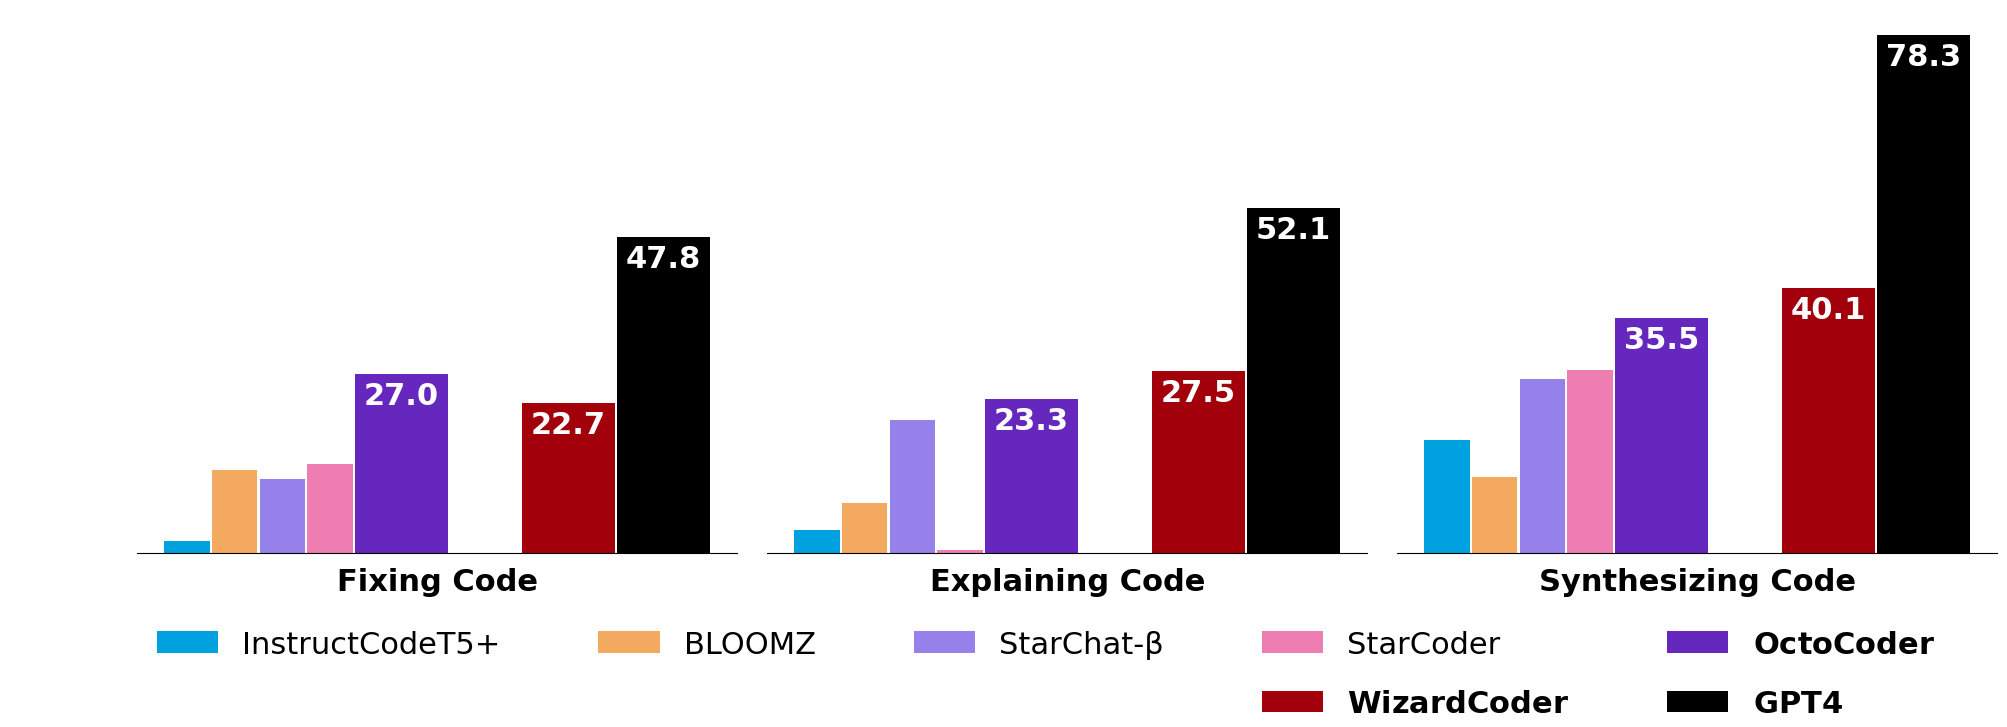

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


FONTSIZE = 22
MODEL_TO_COLOR = {
    'GPT4': '#000000',
    'WizardCoder': '#A2000B', # From Wiz avatar
    'OctoCoder': '#6527BE',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    'StarCoder': '#EE7DB2',
    'StarChat-β': '#9681EB',
    'BLOOMZ': '#F3AA60',
    'InstructCodeT5+': '#00A1DF', # Salesforce logo
}

gpt_4_scores = [47.8, 52.1, 78.3]
wizard_scores = [22.7, 27.5, 40.1]
us_scores = [27.0, 23.3, 35.5]
starchatbeta_scores = [11.2, 20.1, 26.3]
instructcodet5p_scores = [1.8, 3.5, 17.1]
starcoder_scores = [13.4, 0.5, 27.6] # 20.4
bloomz_scores = [12.5, 7.5, 11.5]

MODEL_TO_RES = {
    "InstructCodeT5+": instructcodet5p_scores,
    "BLOOMZ": bloomz_scores,
    "StarChat-β": starchatbeta_scores,
    "StarCoder": starcoder_scores,
    "OctoCoder": us_scores,
    "WizardCoder": wizard_scores,
    "GPT4": gpt_4_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Fixing Code",
    1: "Explaining Code",
    2: "Synthesizing Code",
}

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', edgecolor='k', ncols=3, nrows=1, sharey=True)


#jitter = [-0.5, -0.3, -0.1, 0.1, 0.4, 0.6]
jitter = [-0.5, -0.4, -0.3, -0.2, -0.05, 0.3, 0.5]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        width = 0.195 if i > 3 else 0.095
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=width,#0.195,
            #label=model_name,
            label="$\\bf{" + model_name + "}$" if model_name in ["OctoCoder", "WizardCoder", "GPT4"] else model_name,
            color=MODEL_TO_COLOR[model_name],
            #edgecolor=MODEL_TO_COLOR[model_name],
            #fill=False,
            #linewidth=4,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)
        axes[bar_idx].spines['left'].set_visible(False)
        axes[bar_idx].get_yaxis().set_ticks([])

        if model_res[bar_idx] > 10:
            if i > 3:
                axes[bar_idx].bar_label(bars, fontweight="bold", fontsize=FONTSIZE, color="white", fmt="%.1f", padding=-26)
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)



axes[bar_idx].plot([], [], color="white", label=" ")
axes[bar_idx].plot([], [], color="white", label="  ")
axes[bar_idx].plot([], [], color="white", label="   ")
handles, labels = axes[bar_idx].get_legend_handles_labels()

# Reorder

order = [
    'InstructCodeT5+',
    ' ',
     "BLOOMZ",
    "  ",
    'StarChat-β',
     '   ',
    'StarCoder',
    "$\\bf{WizardCoder}$",
    '$\\bf{OctoCoder}$',
    "$\\bf{GPT4}$",
 ]


handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        #if l == "Data-constrained scaling laws efficient frontier":
        #    to_map = h
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            break

handles, labels = handles_ordered, labels_ordered

legend = fig.legend(
    handles,
    labels,
    loc=(0.072,-0.005),#"lower center",#(0,-0.3),
    ncol=5,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=3.2,
    labelspacing=1,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#shift = max([t.get_window_extent().width for t in legend.get_texts()])
#for t in legend.get_texts():
#    t.set_ha('right') # ha is alias for horizontalalignment
#    t.set_position((shift,0))

#axes[0].set_xlim((-0.60175, 0.65475))
#axes[0].axis('tight')

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
plt.subplots_adjust(wspace=0.05, bottom=0.2)

plt.savefig('humaneval.pdf', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.png', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.svg', dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 22
MODEL_TO_COLOR = {
    'GPT-4': '#000000',
    'WizardCoder': '#A2000B', # From Wiz avatar
    'OctoCoder': '#6527BE',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    'StarChat-β': '#9681EB',
    'InstructCodeT5+': '#00A1DF', # Salesforce logo
}

gpt_4_scores = [47.8, 48.1, 78.3]
wizard_scores = [22.7, 27.5, 40.1]
us_scores = [27.0, 23.3, 35.5]
starchatbeta_scores = [11.2, 20.1, 26.3]
instructcodet5p_scores = [1.8, 3.5, 17.1]
starcoder_scores = [13.4, 15.3, 27.6]

MODEL_TO_RES = {
    "InstructCodeT5+": instructcodet5p_scores,
    "WizardCoder": wizard_scores,
    "StarChat-β": starchatbeta_scores,
    "OctoCoder": us_scores,
    "GPT-4": gpt_4_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Code Repair",
    1: "Code Explanation",
    2: "Code Synthesis",
}

fig, axes = plt.subplots(figsize=(22, 6), facecolor='w', edgecolor='k', ncols=3, nrows=1, sharey=True)


jitter = [-0.5, -0.3, -0.1, 0.1, 0.4, 0.6]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=0.195,
            label=model_name,
            color=MODEL_TO_COLOR[model_name],
            #edgecolor=MODEL_TO_COLOR[model_name],
            #fill=False,
            #linewidth=4,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)
        axes[bar_idx].spines['left'].set_visible(False)
        axes[bar_idx].get_yaxis().set_ticks([])

        if model_res[bar_idx] > 10:
            axes[bar_idx].bar_label(bars, fontweight="bold", fontsize=FONTSIZE, color="white", fmt="%.1f", padding=-26)
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)


handles, labels = axes[bar_idx].get_legend_handles_labels()

legend = fig.legend(
    handles,
    labels,
    loc=(0.07,0.8),#"lower center",#(0,-0.3),
    ncol=5,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=2,
#    padding=8,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
#plt.subplots_adjust(top=1.1)#, right=0.9)

plt.savefig('humaneval.pdf', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.png', dpi=300, bbox_inches='tight')
plt.savefig('humaneval.svg', dpi=300, bbox_inches='tight')


##### Ablations plot

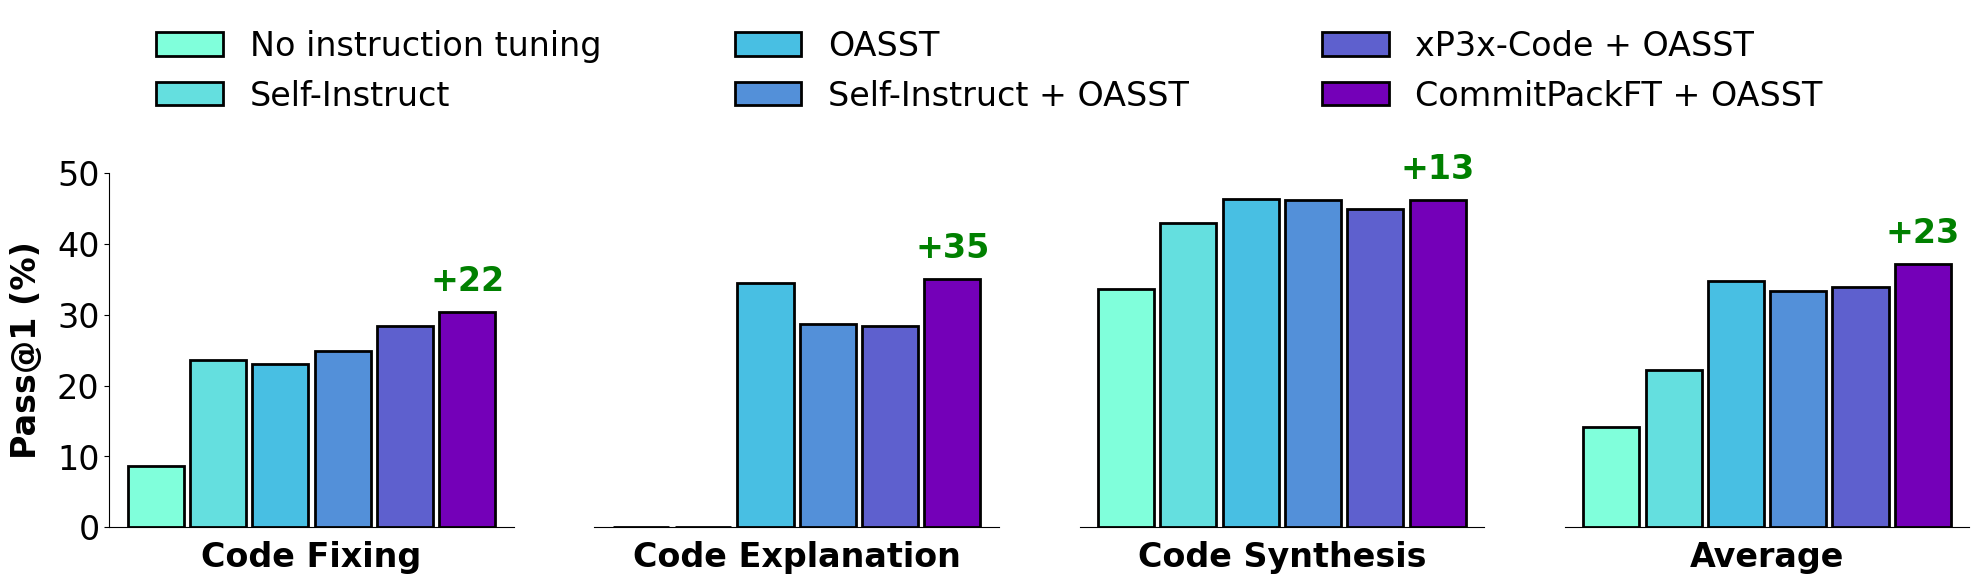

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


FONTSIZE = 24
# https://coolors.co/palette/7400b8-6930c3-5e60ce-5390d9-4ea8de-48bfe3-56cfe1-64dfdf-72efdd-80ffdb
MODEL_TO_COLOR = {
    'CommitPackFT + OASST': '#7400B8',#'#4C3757',#'#FD73C1', #'#4C3757', # From bigcode logo background
    "xP3x-Code + OASST": "#5E60CE",
    "Self-Instruct + OASST": "#5390D9",
    "OASST": "#48BFE3",
    "Self-Instruct": "#64DFDF",
    "No instruction tuning": "#80FFDB",
}

#starcoder_scores = [8.7, 24.0, 33.6, 22.1]
starcoder_scores = [8.7, 0.0, 33.6, 14.1]
#si_scores = [23.6, 0.6, 43.0, 22.2]
si_scores = [23.6, 0.0, 43.0, 22.2]
oasst_scores = [23.1, 34.5, 46.4, 34.7]
sioasst_scores = [24.9, 28.7, 46.2, 33.3]
xp3xoasst_scores = [28.4, 28.4, 45.0, 33.9]
commitsoasst_scores = [30.4, 35.1, 46.2, 37.2]

MODEL_TO_RES = {
    "No instruction tuning": starcoder_scores,
    "Self-Instruct": si_scores,
    "OASST": oasst_scores,
    "Self-Instruct + OASST": sioasst_scores,
    "xP3x-Code + OASST": xp3xoasst_scores,
    "CommitPackFT + OASST": commitsoasst_scores,
#    "StarCoder": starcoder_scores,
}

IDX_TO_LABEL = {
    0: "Code Fixing",
    1: "Code Explanation",
    2: "Code Synthesis",
    3: "Average" ,
}

fig, axes = plt.subplots(figsize=(24, 6), facecolor='w', edgecolor='k', ncols=4, nrows=1, sharey=False)


jitter = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]
for bar_idx, bar_label in IDX_TO_LABEL.items():
    for i, (model_name, model_res) in enumerate(MODEL_TO_RES.items()):
        bars = axes[bar_idx].bar(
            jitter[i],
            model_res[bar_idx],
            width=0.18,
            label=model_name,
            color=MODEL_TO_COLOR[model_name],
            edgecolor="black",
            #fill=False,
            linewidth=2,
        )

        axes[bar_idx].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False # labels along the bottom edge are off
        )
        axes[bar_idx].spines['top'].set_visible(False)
        axes[bar_idx].spines['right'].set_visible(False)

        axes[bar_idx].set_ylim((0, 50))
        if bar_idx != 0:
            axes[bar_idx].spines['left'].set_visible(False)
            axes[bar_idx].get_yaxis().set_ticks([])


        if model_name == "CommitPackFT + OASST":
            #ls = [round((model_res[bar_idx]/starcoder_scores[k])-1) for k,x in enumerate(model_res)]
            axes[bar_idx].bar_label(
                bars,
                #labels=["+" + str(round(((model_res[bar_idx]/starcoder_scores[bar_idx])-1)*100)) + "%"],
                labels=["+" + str(round(model_res[bar_idx] - starcoder_scores[bar_idx]))],
                fontweight="bold",
                fontsize=FONTSIZE,
                color="green",
                #fmt="%.1f",
                padding=10
              )
        axes[bar_idx].set_xlabel(bar_label, fontweight="bold", fontsize=FONTSIZE, labelpad=10)

        if bar_idx == 0:
            axes[bar_idx].tick_params(axis='both', which='major', labelsize=FONTSIZE)
            axes[bar_idx].set_ylabel("Pass@1 (%)", fontweight="bold", fontsize=FONTSIZE, labelpad=10)


handles, labels = axes[bar_idx].get_legend_handles_labels()

legend = fig.legend(
    handles,
    labels,
    loc="upper center",#(0.07,0.8),#"lower center",#(0,-0.3),
    ncol=3,
    frameon=False,
    fontsize=FONTSIZE,
    columnspacing=4,
#    padding=8,
#    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

#plt.legend(loc="upper center", ncol=5, fontsize=FONTSIZE, frameon=False)
#axes[1].set_title("Multilingual Multitask Generalization", y=1.10, fontsize=24, fontweight="bold")
#lines, labels = plt.get_legend_handles_labels()
#plt.legend(lines, labels, fontsize=15, ncol=2)
plt.subplots_adjust(top=0.7)#, right=0.9)

plt.savefig('ablations.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ablations.png', dpi=300, bbox_inches='tight')
plt.savefig('ablations.svg', dpi=300, bbox_inches='tight')

##### Data distribution

<ipython-input-2-d39078b538f0>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=90)


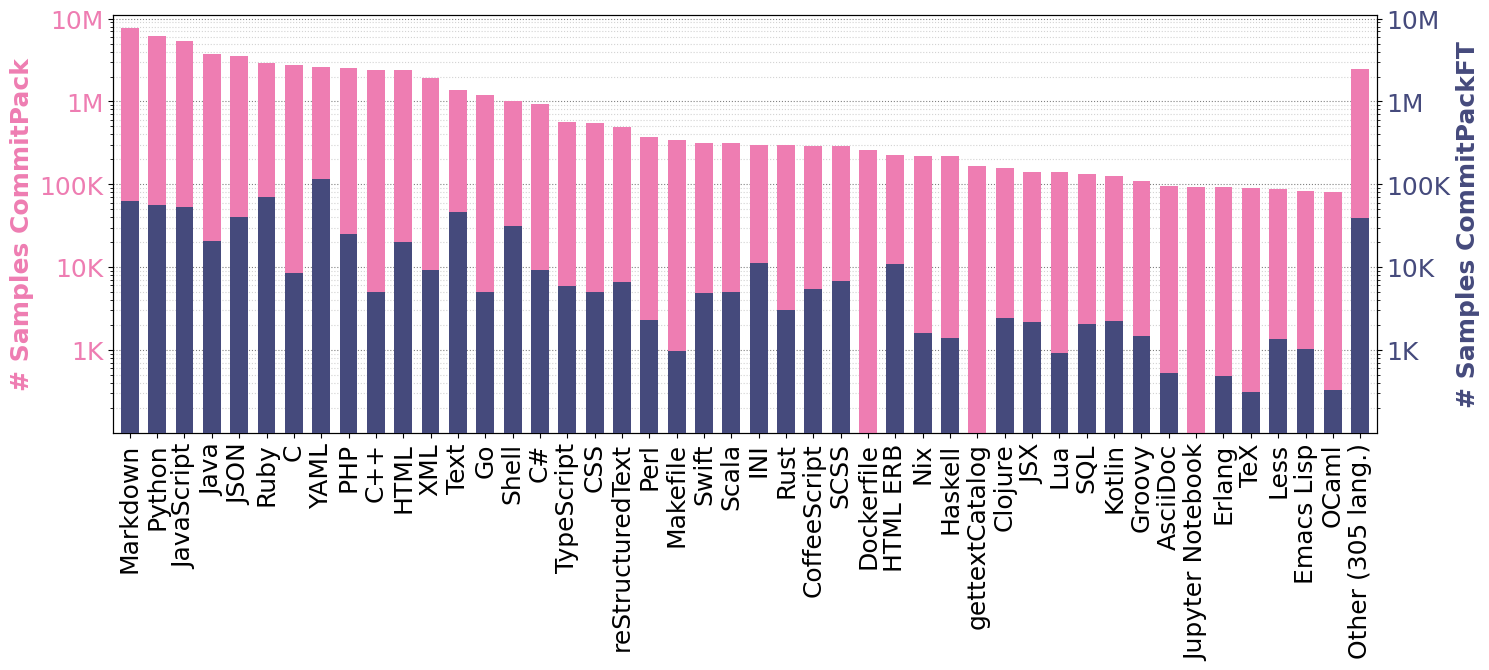

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


LANG_TO_NAME = {
    "javascript": "JavaScript",
    "c #": "C#",
    "f #": "F#",
    "php": "PHP",
    "css": "CSS",
    "html": "HTML",
    "xml": "XML",
    "restructuredtext": "reStructuredText",
    "jupyter-notebook": "Jupyter Notebook",
    "tex": "TeX",
    "json": "JSON",
    "yaml": "YAML",
    "typescript": "TypeScript",
    "ini": "INI",
    "coffeescript": "CoffeeScript",
    "scss": "SCSS",
    "html+erb": "HTML ERB",
    "gettext-catalog": "gettextCatalog",
    "jsx": "JSX",
    "sql": "SQL",
    "asciidoc": "AsciiDoc",
    "emacs-lisp": "Emacs Lisp",
    "ocaml": "OCaml",
    "csv": "CSV",
    "haml": "HAML",
    "common-lisp": "Common Lisp",
    "viml": "VimL",
}
FONTSIZE = 22


# plt.rcParams["font.family"] = "Times New Roman"
# Data for the chart
categories = ["markdown", "python", "javascript", "java", "json", "ruby", "c", "yaml", "php", "c++", "html", "xml", "text", "go", "shell", "c #", "typescript", "css", "restructuredtext", "perl", "makefile", "swift", "scala", "ini", "rust", "coffeescript", "scss", "dockerfile", "html+erb", "nix", "haskell", "gettext-catalog", "clojure", "jsx", "lua", "sql", "kotlin", "groovy", "asciidoc", "jupyter-notebook", "erlang", "tex", "less", "emacs-lisp", "ocaml", "csv", "haml", "common-lisp", "viml", "vue", "f #", "toml", "cmake", "dart", "dm", "powershell", "java-server-pages", "handlebars", "jade", "batchfile", "bitbake", "pascal", "smarty", "twig", "rdoc", "freemarker", "elixir", "groff", "arduino", "objective-c++", "unknown", "scheme", "org", "actionscript", "haxe", "xslt", "svg", "cucumber", "chapel", "boo", "cython", "cobol", "lolcode", "sass", "julia", "stylus", "diff", "standard-ml", "qml", "slim", "elm", "textile", "html+php", "unity3d-asset", "racket", "tcl", "factor", "fish", "gas", "pod", "vala", "fortran", "hcl", "ada", "r", "m4", "saltstack", "perl6", "nimrod", "smalltalk", "cuda", "literate-haskell", "llvm", "html+django", "visual-basic", "mediawiki", "glsl", "coldfusion", "robotframework", "protocol-buffer", "mako", "isabelle", "yacc", "assembly", "sqf", "xtend", "lean", "owl", "ceylon", "groovy-server-pages", "pir", "processing", "livescript", "purescript", "desktop", "agda", "nit", "jasmin", "api-blueprint", "rhtml", "coldfusion-cfc", "zig", "asp", "crystal", "nsis", "systemverilog", "turtle", "g-code", "solidity", "antlr", "qmake", "ooc", "xs", "idris", "inno-setup", "liquid", "modelica", "bluespec", "opencl", "edn", "max", "eagle", "xquery", "awk", "vhdl", "openscad", "html+eex", "graphql", "abap", "moonscript", "krl", "json5", "logos", "xbase", "volt", "linker-script", "oz", "hlsl", "graphviz-dot", "autohotkey", "latte", "monkey", "stata", "jsoniq", "maple", "applescript", "zephir", "pike", "io", "red", "literate-coffeescript", "sparql", "logtalk", "emberscript", "c2hs-haskell", "thrift", "genshi", "raml", "mathematica", "xproc", "postscript", "gnuplot", "ragel-in-ruby-host", "hy", "dcl", "kicad", "arc", "rmarkdown", "tcsh", "vcl", "sourcepawn", "mirah", "lex", "fancy", "xojo", "slash", "pan", "uno", "propeller-spin", "pony", "pure-data", "gentoo-ebuild", "yang", "apl", "unrealscript", "pawn", "literate-agda", "jflex", "cartocss", "stan", "squirrel", "piglatin", "nesc", "jsonld", "gdscript", "aspectj", "clips", "renpy", "sage", "ston", "rouge", "augeas", "igor-pro", "ats", "scilab", "eiffel", "ioke", "creole", "bro", "capn-proto", "supercollider", "urweb", "lfe", "dylan", "autoit", "sas", "forth", "lilypond", "wisp", "rebol", "csound", "parrot-assembly", "blitzmax", "opa", "alloy", "cycript", "ninja", "inform-7", "mupad", "smali", "clean", "nu", "brainfuck", "metal", "redcode", "netlinx", "j", "netlogo", "http", "papyrus", "smt", "golo", "harbour", "myghty", "pov-ray-sdl", "chuck", "webidl", "ec", "mms", "xc", "webassembly", "darcs-patch", "coq", "lsl", "pogoscript", "shen", "opal", "lasso", "labview", "gosu", "apacheconf", "dns-zone", "renderscript", "ecl", "kit", "flux", "maxscript", "gap", "component-pascal", "gf", "objective-j", "mask", "purebasic", "prolog", "x10", "scaml", "ags-script", "tea", "matlab", "brightscript", "d", "gams", "parrot", "self", "clarion", "mtml", "octave", "fantom", "lookml", "dogescript", "python-traceback", "click", "oxygene", "irc-log", "glyph", "zimpl", "xpages", "unified-parallel-c", "gentoo-eclass", "nginx", "cirru", "txl", "befunge", "idl", "numpy", "objdump", "realbasic", "bison", "m", "omgrofl"]
column1 = [7645354, 6189601, 5401937, 3744377, 3495038, 2928702, 2779478, 2592787, 2555419, 2402294, 2366841, 1923159, 1389525, 1183612, 1017977, 923157, 572136, 548818, 494037, 374266, 343379, 319289, 316064, 297100, 296214, 292446, 288190, 259379, 225379, 221281, 217325, 168327, 158674, 139148, 139091, 132772, 124266, 110057, 96671, 94000, 93685, 89283, 88634, 83228, 81360, 79268, 74792, 74628, 74062, 68967, 66840, 63517, 58446, 56873, 55584, 55381, 53574, 49842, 46993, 43674, 43239, 42511, 41065, 39588, 38760, 36216, 35473, 32923, 32350, 32227, 30570, 30546, 30198, 28819, 28447, 27956, 27095, 26677, 26447, 26289, 25927, 24953, 24861, 23144, 22695, 21967, 21021, 20097, 19360, 18726, 18542, 18491, 18381, 17867, 16615, 16407, 15378, 15351, 15121, 14922, 14822, 13463, 13379, 13258, 12858, 12465, 12314, 12167, 12023, 11741, 11450, 10729, 10727, 10535, 10511, 10188, 9478, 9263, 9211, 9202, 8943, 8359, 8230, 8126, 7778, 7775, 7507, 7458, 7256, 6695, 6231, 5912, 5194, 5024, 5021, 4956, 4951, 4782, 4765, 4551, 4410, 4290, 4286, 4217, 4048, 3944, 3882, 3690, 3689, 3651, 3632, 3416, 3215, 3025, 3014, 2651, 2611, 2500, 2489, 2289, 2259, 2237, 2237, 2206, 2185, 2178, 2100, 2009, 1955, 1951, 1879, 1827, 1733, 1670, 1660, 1604, 1551, 1529, 1525, 1452, 1380, 1367, 1344, 1343, 1311, 1304, 1265, 1262, 1247, 1108, 1041, 1036, 1035, 1024, 1021, 1007, 956, 948, 925, 914, 903, 889, 888, 879, 833, 759, 758, 750, 748, 747, 717, 706, 705, 675, 642, 640, 637, 628, 625, 624, 603, 601, 597, 586, 585, 580, 567, 555, 555, 540, 531, 513, 473, 462, 460, 451, 450, 421, 414, 414, 396, 395, 388, 383, 375, 373, 373, 337, 333, 330, 318, 304, 287, 280, 279, 269, 265, 265, 262, 239, 229, 227, 220, 211, 203, 197, 187, 184, 178, 174, 171, 170, 167, 151, 149, 144, 142, 140, 140, 130, 117, 115, 107, 105, 104, 99, 96, 94, 91, 88, 83, 80, 80, 74, 74, 71, 69, 67, 61, 60, 59, 54, 54, 48, 48, 47, 47, 46, 43, 39, 37, 37, 36, 35, 33, 31, 31, 29, 29, 28, 20, 18, 17, 15, 13, 13, 12, 11, 10, 10, 10, 9, 9, 9, 7, 7, 7, 6, 6, 6, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1]
column2 = [62518, 56025, 52989, 20635, 39777, 69413, 8506, 114320, 24791, 4992, 20214, 9337, 46588, 5004, 31217, 9346, 5868, 5049, 6560, 2288, 960, 4849, 5040, 11360, 2996, 5513, 6829, 39, 10910, 1593, 1389, 72, 2403, 2199, 920, 2069, 2214, 1486, 523, 48, 480, 307, 1360, 1015, 333, 375, 4415, 778, 1063, 587, 254, 3424, 981, 765, 16, 991, 173, 1429, 1119, 1466, 1308, 25, 737, 1610, 270, 510, 1150, 192, 225, 86, 1597, 213, 136, 49, 174, 99, 169, 976, 20, 2, 123, 0, 0, 705, 180, 480, 680, 72, 368, 1052, 265, 61, 150, 101, 117, 103, 113, 813, 193, 54, 50, 70, 421, 265, 121, 101, 617, 122, 67, 284, 25, 7, 780, 399, 48, 33, 164, 9, 85, 181, 170, 2, 3, 105, 45, 55, 3, 0, 49, 25, 23, 35, 63, 80, 186, 10, 3, 9, 23, 135, 20, 4, 22, 182, 15, 35, 21, 7, 37, 15, 140, 15, 7, 38, 16, 30, 15, 2, 23, 48, 0, 4, 39, 52, 5, 21, 135, 17, 1, 10, 4, 33, 19, 3, 9, 37, 8, 11, 35, 15, 7, 4, 10, 6, 2, 19, 4, 6, 4, 1, 19, 23, 21, 7, 2, 28, 3, 9, 1, 3, 9, 17, 4, 12, 19, 0, 2, 0, 10, 18, 3, 16, 0, 8, 0, 4, 23, 2, 1, 16, 1, 16, 6, 7, 1, 3, 1, 3, 1, 0, 4, 11, 7, 6, 9, 8, 0, 3, 1, 6, 41, 13, 1, 3, 10, 2, 25, 2, 3, 12, 2, 6, 6, 2, 0, 1, 2, 6, 3, 3, 4, 2, 1, 0, 0, 0, 14, 2, 4, 0, 1, 2, 2, 4, 0, 1, 0, 19, 0, 0, 3, 0, 1, 0, 5, 0, 6, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 3, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

TOP_LANG = 45
categories = categories[:TOP_LANG] + [f"other ({len(categories)-TOP_LANG} lang.)"]
column1 = column1[:TOP_LANG] + [sum(column1[TOP_LANG:])]
column2 = column2[:TOP_LANG] + [sum(column2[TOP_LANG:])]


COLOR_A, COLOR_B = '#EE7DB2', '#454A7C'

categories = [LANG_TO_NAME.get(text, text.capitalize()) for text in categories]

# Set the plot width
plot_width = 15

# Calculate the bar width based on the plot width
bar_width = plot_width * 2 / len(categories)

# Plotting the chart
fig, ax1 = plt.subplots(figsize=(plot_width, 6.8))
ax1.yaxis.grid(True, linestyle='dotted', color='gray')
ax1.yaxis.grid(True, which='minor', linestyle='dotted', color='lightgray')


x = np.arange(len(categories))
# Column 1
ax1.bar(categories, column1, width=bar_width, color=COLOR_A, zorder=10)
#ax1.set_xlabel('Programming Language', fontweight='bold', fontsize=16)
ax1.set_ylabel('# Samples CommitPack', color=COLOR_A, fontweight='bold', fontsize=18)
ax1.tick_params(axis='y', labelcolor=COLOR_A)

# Creating the second y-axis
ax2 = ax1.twinx()

# Column 2
ax2.bar(categories, column2, width=bar_width, color=COLOR_B, zorder=10)
ax2.set_ylabel('# Samples CommitPackFT', color=COLOR_B, fontweight='bold', fontsize=18)
ax2.tick_params(axis='y', labelcolor=COLOR_B)

# Adjusting the ranges of the y-axes
ax1.set_ylim(1e2, 1.1e7)
ax2.set_ylim(1e2, 1.1e7)  # Range for Column 2

ax1.set_yscale('log')
ax2.set_yscale('log')

# Customizing the chart
ax1.set_xticklabels(categories, rotation=90)

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)


ax1.set_yticks([10**3, 10**4, 10**5, 10**6, 10**7], ["1K", "10K", "100K", "1M", "10M"], fontsize=18)
ax2.set_yticks([10**3, 10**4, 10**5, 10**6, 10**7], ["1K", "10K", "100K", "1M", "10M"], fontsize=18)

plt.xlim([-0.6, len(x)-0.4])


# Displaying the chart
plt.tight_layout()
plt.savefig('distribution.pdf', format='pdf')


###### OLD

<ipython-input-14-6d3eec0a55d3>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(langs, rotation=90)


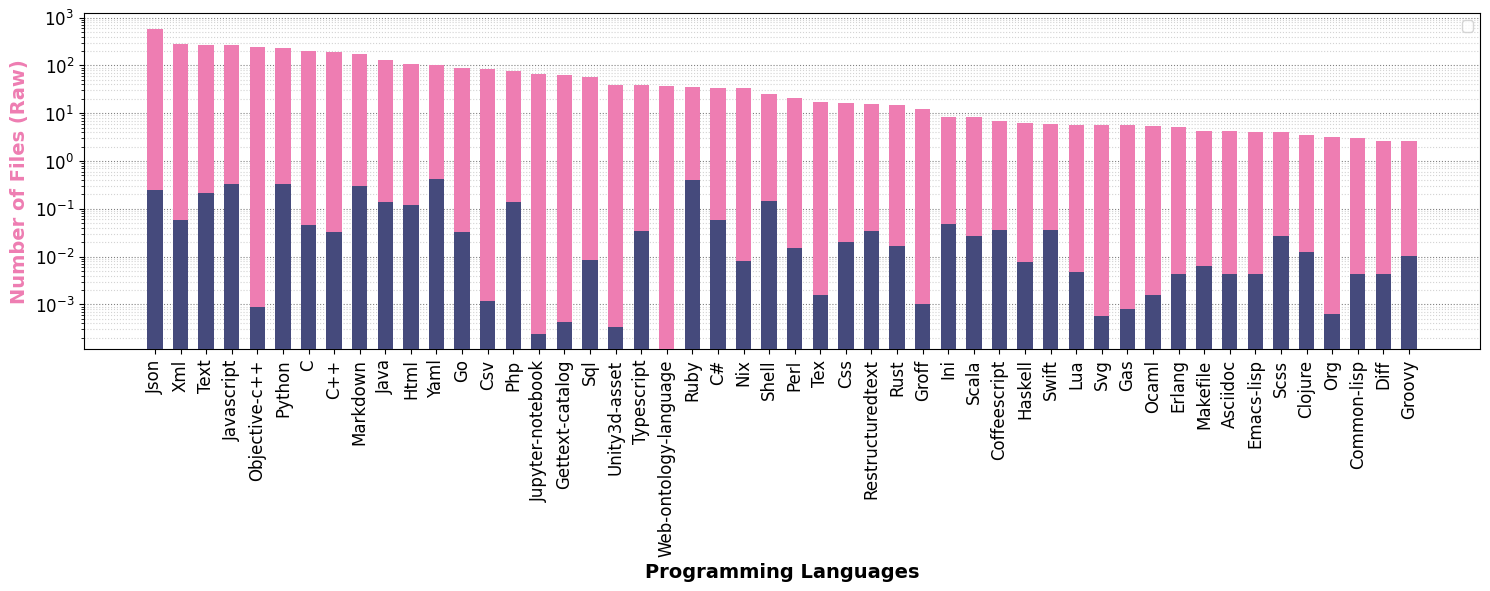

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = "Times New Roman"
# Data for the chart
# The Stack 1.1
# https://docs.google.com/spreadsheets/d/1UI--YM7bi6nIqFIHFWpeLScBljnb8i7Y6F1RdbbuM1w/edit#gid=951355010
stacksamples = "23513.00 215663.00 60326.00 24993.00 2004.00 19908.00 88.00 16787.00 471.00 3716.00 2394.00 6031.00 2638.00 211892.00 474525.00 159338.00 4458.00 363426.00 4236.00 255.00 18230.00 16780.00 13453.00 440143.00 37.00 176.00 137979.00 386.00 2000.00 9048.00 6868 10832 2862 1100 21384106 14820921 21702300 1492 3202 3053 8273 33787 1623 1197 1237 926 483 2291 177400 586280 4046 331826 20992 23568 156801 1151 59 767 124748 1845 5889822 7640470 132603 145488 557 86172 604 376 1734101 23217 526834 35508 4845 1949 1265296 387 7152 70847 1978 311 10899 30682 39312 594102 90644 122316 3487 203195 219540 29488 611 3186 53408 3201 5669 287131 114994 16048 5275 2158 186517 156345 466 75148 439 775247 317787 52 53926 11653271 629 1626 636 5938 68266 187241 490294 504172 21695 180496 389884 911 798876 241029 470653 48677 35597500 97835 22763 862347 142331 31305 2093 990 10530 819 515 2537785 6568 3522 537 105 7738 3321 117325 11489 42429458 407288 40113161 5346 80803060 8465 5606 52262 1462282 480278 1459454 12744 1731 3782209 366 2879 6232 8607 51124 615537 4253 1194 8932 53161 40818 1211 1317 10618 12083 180866 30035 8419 873 635 3314 925891 134 57792 1483389 15934 3472 40751617 2130 63795 1297 14298 753 49419 8711 17003 43298 640 1939 6159 601 684 866 13 27206 202 3678 15 91051 11995 121 456550 10359 1372 7 1407 167710 521 354809 215 4 1771 385 185 59137 23888 57588 416 63 1260 8901 19646 32 799 2158 176639 3091 834416 15601 34852080 2237 1067 35697 254 5222 24003 2364 528119 70871 1883 2927 254674 18688 22424 42907 24214787 13 14693 82711 51891 5553 2891 17880 14960 989 2025 5725 588 6332 1756 1761105 8686 6575 25102 6277 7205611 3057248 2174 40171 15257 132730 2787533 149 64961 3840 3384772 111 3769950 12 421 15825 64833 403309 774049 256498 144547 389003 9572 24519 54949 1386770 7491 14017 68834 45610 2086 116374 3535 6411512 2941410 100759 109546 20549 1292 705351 21630101 10967 11730 994884 375 219877 575086 180 19589046 241 9834153 6160 13293 1341 5838 1848 1831 119376 171860 398686 5819 2822753 42905 15489 4674 160 458 12621 1519 23441076 3791 939 1791 38948 4050 101114 15151 109246 13439795 55459 8700 39896 356"
stacksamples = stacksamples.split(" ")
stackgb = "0.234795547 1.252976501 0.927934285 0.113360484 0.023055257 0.15921309 0.000102258 0.181756872 0.000916935 0.051131668 0.010115432 0.012035021 0.025007812 1.168354526 5.049326247 0.882732401 0.011990774 2.571910049 0.020232649 0.001335441 0.124974684 0.176418641 0.03653505 1.057215698 4.01E-06 0.0042033 0.201950589 0.011932269 0.018481843 0.062198773 0.00928004 0.059123595 0.020099161 0.003634361 255.2917214 215.0704326 133.5517298 0.015957749 0.033554885 0.050359728 0.024442641 0.203354917 0.004011447 0.069226909 0.013156489 0.005349627 0.002468374 0.01329394 1.043958315 2.097489993 0.025370284 2.575012777 0.116668973 0.165367388 3.590497053 0.137180311 0.000645042 0.001679917 0.577072174 0.048559782 150.1962574 403.991249 0.469592054 1.763779303 0.016858076 1.568040712 0.002904639 0.002578878 12.23578105 0.014601074 4.859482239 0.115847238 0.03374987 0.033331423 1.89923435 0.00015154 0.062376725 6.232076471 0.057902226 0.002882898 0.051303735 1.452188013 0.20375105 2.239301725 0.582485019 1.932211787 0.042129808 2.696572679 2.55239895 0.125455149 0.00154599 0.015091289 0.108946934 0.022085839 0.028926935 3.81257366 0.578698419 1.039419738 0.121550001 0.018498604 3.041915671 0.368427418 0.01275981 0.096310362 0.003521311 38.7015604 1.16006382 0.000816506 2.896288544 112.858429 0.000791619 0.008888496 0.001388412 0.065864095 0.637335038 2.145963566 6.305577637 2.832428532 0.130787359 0.268170362 0.96231762 0.002022638 5.847595358 1.505675415 1.50613352 0.180208291 812.7323236 0.36780562 0.039831089 1.634759254 0.624851985 0.086100229 0.01269998 0.074245576 0.053522551 0.014400489 0.018418389 10.15306206 0.048385646 0.010619404 0.004094325 0.006795539 0.13893621 0.016590565 0.266515974 0.069046522 266.4128508 2.095180596 496.218439 0.035422318 1334.776042 0.136568991 0.008144893 0.594196065 4.970281147 3.398967344 187.6614955 3.180123424 0.007870748 12.24011311 0.001534909 0.127239985 0.241006287 0.018704003 0.741609729 3.017784458 0.10768946 0.002735011 0.040157565 0.341280374 0.187091021 0.015250012 0.006340162 0.174309317 0.057619061 3.025824295 0.499231052 0.026111754 0.001348489 0.009913804 0.02192912 7.092098469 7.75E-05 1.141226687 6.877547126 0.142623149 0.036937171 245.2580762 0.018113773 2.270829091 0.057336154 0.67702276 0.00738163 0.372969001 0.031075999 0.300616591 0.374624266 0.00563429 0.008316588 0.021999287 0.001797237 0.001782641 0.00742168 6.73E-05 0.191215413 0.002907737 0.087880024 2.26E-05 1.135476493 0.270094734 0.00032798 5.662322762 0.081675458 0.00437905 1.32E-05 0.081990755 2.026630646 0.014589486 3.86628944 0.003773061 3.03E-06 0.007027999 0.004110113 0.000513464 0.644819047 0.161885676 0.463770763 0.002285131 0.000271059 0.005203646 0.094285912 0.053366917 5.77E-05 0.000877511 0.109065325 3.118041961 0.075236878 7.075748009 0.152951088 185.7920442 0.003880126 0.003775692 0.471887412 0.000592216 0.032628456 1.912459035 0.034143519 3.416801031 0.351928971 0.026909172 0.03321291 1.992494334 0.14559057 0.112010701 0.209443173 200.9317184 3.50E-05 0.042915441 0.471753504 0.382901343 0.069011432 0.025405497 0.090588329 0.074254752 0.01158498 0.010861994 0.081733235 0.002931743 0.145365138 0.004225249 12.39252476 0.011738 0.072852774 0.130290667 0.015733886 25.94831211 39.85010941 0.01659087 0.066621966 0.336574323 0.283497933 15.56099429 0.000221364 0.597677147 0.01974692 10.35454306 0.000741471 9.068557971 1.64E-05 0.001728279 0.065358373 0.087255133 4.188520568 1.280181416 1.032487087 7.929300271 3.522135275 0.177810251 0.055494597 0.233392908 19.94140546 0.050541965 0.189823875 1.187680022 0.576968911 0.001520054 0.254176862 0.027153333 115.1166198 13.59675604 1.122050534 1.068810178 0.06814617 0.049878972 8.185863193 334.7969752 0.0760602 0.082791467 1.723912143 0.009069881 4.422612155 1.818708444 0.002318393 131.0102447 0.001681667 19.53834273 0.020865105 0.116723866 0.009513181 0.034249148 0.008303748 0.007740109 3.071884601 1.305750596 3.813825746 0.02704758 13.44051699 2.182868126 0.613659183 0.009517622 0.001021054 0.001801915 0.121968228 0.012962796 289.3730587 0.04040784 0.003322196 0.009446599 0.079597994 0.135865433 1.86145082 0.071495663 1.266035466 90.68185771 1.82389773 0.053878888 1.167169398 0.002439126"
stackgb = stackgb.split(" ")
stacklangs = "abap actionscript ada agda ags-script alloy ampl antlr apacheconf api-blueprint apl applescript arc arduino asciidoc asp aspectj assembly ats augeas autohotkey autoit awk batchfile befunge bison bitbake blitzbasic blitzmax bluespec boo brainfuck brightscript bro c c++ c# c2hs-haskell cap'n-proto cartocss ceylon chapel chuck cirru clarion clean click clips clojure cmake cobol coffeescript coldfusion coldfusion-cfc common-lisp component-pascal coq creole crystal csound css csv cucumber cuda cycript cython d darcs-patch dart desktop diff digital-command-language dm dns-zone dockerfile dogescript dylan eagle ec ecere-projects ecl edn eiffel elixir elm emacs-lisp emberscript erlang f# factor fancy fantom fish flux forth fortran freemarker g-code gams gap gas gdscript genshi gentoo-ebuild gentoo-eclass gettext-catalog glsl glyph gnuplot go golo gosu grace grammatical-framework graphql graphviz-(dot) groff groovy groovy-server-pages haml handlebars harbour haskell haxe hcl hlsl html html+django html+eex html+erb html+php http hy idl idris igor-pro inform-7 ini inno-setup io ioke irc-log isabelle j jade jasmin java java-server-pages javascript jflex json json5 jsoniq jsonld jsx julia jupyter-notebook kicad kit kotlin krl labview lasso latte lean less lex lfe lilypond linker-script liquid literate-agda literate-coffeescript literate-haskell livescript llvm logos logtalk lolcode lookml lsl lua m m4 makefile mako maple markdown mask mathematica matlab max maxscript mediawiki metal mirah modelica module-management-system monkey moonscript mtml muf mupad myghty nesc netlinx netlogo nginx nimrod ninja nit nix nsis nu numpy objdump objective-c++ objective-j ocaml octave omgrofl ooc opa opal opencl openscad org ox oxygene oz pan papyrus parrot parrot-assembly parrot-internal-representation pascal pawn perl perl6 php piglatin pike pod pogoscript pony postscript pov-ray-sdl powershell processing prolog propeller-spin protocol-buffer pure-data purebasic purescript python python-traceback qmake qml r racket ragel-in-ruby-host raml rdoc realbasic rebol red redcode ren'py renderscript restructuredtext rhtml rmarkdown robotframework rouge ruby rust sage saltstack sas sass scala scaml scheme scilab scss self shell shellsession shen slash slim smali smalltalk smarty smt solidity sourcepawn sparql sqf sql squirrel stan standard-ml stata ston stylus supercollider svg swift systemverilog tcl tcsh tea tex text textile thrift toml turing turtle twig txl typescript unified-parallel-c unity3d-asset uno unrealscript urweb vala vcl verilog vhdl viml visual-basic volt vue web-ontology-language webassembly webidl wisp x10 xbase xc xml xojo xpages xproc xquery xs xslt xtend yacc yaml yang zephir zig zimpl"
stacklangs = stacklangs.split(" ")


categories = ["markdown", "python", "javascript", "java", "json", "ruby", "c", "yaml", "php", "c++", "html", "xml", "text", "go", "shell", "c #", "typescript", "css", "restructuredtext", "perl", "makefile", "swift", "scala", "ini", "rust", "coffeescript", "scss", "dockerfile", "html+erb", "nix", "haskell", "gettext-catalog", "clojure", "jsx", "lua", "sql", "kotlin", "groovy", "asciidoc", "jupyter-notebook", "erlang", "tex", "less", "emacs-lisp", "ocaml", "csv", "haml", "common-lisp", "viml", "vue", "f #", "toml", "cmake", "dart", "dm", "powershell", "java-server-pages", "handlebars", "jade", "batchfile", "bitbake", "pascal", "smarty", "twig", "rdoc", "freemarker", "elixir", "groff", "arduino", "objective-c++", "unknown", "scheme", "org", "actionscript", "haxe", "xslt", "svg", "cucumber", "chapel", "boo", "cython", "cobol", "lolcode", "sass", "julia", "stylus", "diff", "standard-ml", "qml", "slim", "elm", "textile", "html+php", "unity3d-asset", "racket", "tcl", "factor", "fish", "gas", "pod", "vala", "fortran", "hcl", "ada", "r", "m4", "saltstack", "perl6", "nimrod", "smalltalk", "cuda", "literate-haskell", "llvm", "html+django", "visual-basic", "mediawiki", "glsl", "coldfusion", "robotframework", "protocol-buffer", "mako", "isabelle", "yacc", "assembly", "sqf", "xtend", "lean", "owl", "ceylon", "groovy-server-pages", "pir", "processing", "livescript", "purescript", "desktop", "agda", "nit", "jasmin", "api-blueprint", "rhtml", "coldfusion-cfc", "zig", "asp", "crystal", "nsis", "systemverilog", "turtle", "g-code", "solidity", "antlr", "qmake", "ooc", "xs", "idris", "inno-setup", "liquid", "modelica", "bluespec", "opencl", "edn", "max", "eagle", "xquery", "awk", "vhdl", "openscad", "html+eex", "graphql", "abap", "moonscript", "krl", "json5", "logos", "xbase", "volt", "linker-script", "oz", "hlsl", "graphviz-dot", "autohotkey", "latte", "monkey", "stata", "jsoniq", "maple", "applescript", "zephir", "pike", "io", "red", "literate-coffeescript", "sparql", "logtalk", "emberscript", "c2hs-haskell", "thrift", "genshi", "raml", "mathematica", "xproc", "postscript", "gnuplot", "ragel-in-ruby-host", "hy", "dcl", "kicad", "arc", "rmarkdown", "tcsh", "vcl", "sourcepawn", "mirah", "lex", "fancy", "xojo", "slash", "pan", "uno", "propeller-spin", "pony", "pure-data", "gentoo-ebuild", "yang", "apl", "unrealscript", "pawn", "literate-agda", "jflex", "cartocss", "stan", "squirrel", "piglatin", "nesc", "jsonld", "gdscript", "aspectj", "clips", "renpy", "sage", "ston", "rouge", "augeas", "igor-pro", "ats", "scilab", "eiffel", "ioke", "creole", "bro", "capn-proto", "supercollider", "urweb", "lfe", "dylan", "autoit", "sas", "forth", "lilypond", "wisp", "rebol", "csound", "parrot-assembly", "blitzmax", "opa", "alloy", "cycript", "ninja", "inform-7", "mupad", "smali", "clean", "nu", "brainfuck", "metal", "redcode", "netlinx", "j", "netlogo", "http", "papyrus", "smt", "golo", "harbour", "myghty", "pov-ray-sdl", "chuck", "webidl", "ec", "mms", "xc", "webassembly", "darcs-patch", "coq", "lsl", "pogoscript", "shen", "opal", "lasso", "labview", "gosu", "apacheconf", "dns-zone", "renderscript", "ecl", "kit", "flux", "maxscript", "gap", "component-pascal", "gf", "objective-j", "mask", "purebasic", "prolog", "x10", "scaml", "ags-script", "tea", "matlab", "brightscript", "d", "gams", "parrot", "self", "clarion", "mtml", "octave", "fantom", "lookml", "dogescript", "python-traceback", "click", "oxygene", "irc-log", "glyph", "zimpl", "xpages", "unified-parallel-c", "gentoo-eclass", "nginx", "cirru", "txl", "befunge", "idl", "numpy", "objdump", "realbasic", "bison", "m", "omgrofl"]
commitpacksamples = [7645354, 6189601, 5401937, 3744377, 3495038, 2928702, 2779478, 2592787, 2555419, 2402294, 2366841, 1923159, 1389525, 1183612, 1017977, 923157, 572136, 548818, 494037, 374266, 343379, 319289, 316064, 297100, 296214, 292446, 288190, 259379, 225379, 221281, 217325, 168327, 158674, 139148, 139091, 132772, 124266, 110057, 96671, 94000, 93685, 89283, 88634, 83228, 81360, 79268, 74792, 74628, 74062, 68967, 66840, 63517, 58446, 56873, 55584, 55381, 53574, 49842, 46993, 43674, 43239, 42511, 41065, 39588, 38760, 36216, 35473, 32923, 32350, 32227, 30570, 30546, 30198, 28819, 28447, 27956, 27095, 26677, 26447, 26289, 25927, 24953, 24861, 23144, 22695, 21967, 21021, 20097, 19360, 18726, 18542, 18491, 18381, 17867, 16615, 16407, 15378, 15351, 15121, 14922, 14822, 13463, 13379, 13258, 12858, 12465, 12314, 12167, 12023, 11741, 11450, 10729, 10727, 10535, 10511, 10188, 9478, 9263, 9211, 9202, 8943, 8359, 8230, 8126, 7778, 7775, 7507, 7458, 7256, 6695, 6231, 5912, 5194, 5024, 5021, 4956, 4951, 4782, 4765, 4551, 4410, 4290, 4286, 4217, 4048, 3944, 3882, 3690, 3689, 3651, 3632, 3416, 3215, 3025, 3014, 2651, 2611, 2500, 2489, 2289, 2259, 2237, 2237, 2206, 2185, 2178, 2100, 2009, 1955, 1951, 1879, 1827, 1733, 1670, 1660, 1604, 1551, 1529, 1525, 1452, 1380, 1367, 1344, 1343, 1311, 1304, 1265, 1262, 1247, 1108, 1041, 1036, 1035, 1024, 1021, 1007, 956, 948, 925, 914, 903, 889, 888, 879, 833, 759, 758, 750, 748, 747, 717, 706, 705, 675, 642, 640, 637, 628, 625, 624, 603, 601, 597, 586, 585, 580, 567, 555, 555, 540, 531, 513, 473, 462, 460, 451, 450, 421, 414, 414, 396, 395, 388, 383, 375, 373, 373, 337, 333, 330, 318, 304, 287, 280, 279, 269, 265, 265, 262, 239, 229, 227, 220, 211, 203, 197, 187, 184, 178, 174, 171, 170, 167, 151, 149, 144, 142, 140, 140, 130, 117, 115, 107, 105, 104, 99, 96, 94, 91, 88, 83, 80, 80, 74, 74, 71, 69, 67, 61, 60, 59, 54, 54, 48, 48, 47, 47, 46, 43, 39, 37, 37, 36, 35, 33, 31, 31, 29, 29, 28, 20, 18, 17, 15, 13, 13, 12, 11, 10, 10, 10, 9, 9, 9, 7, 7, 7, 6, 6, 6, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1]
commitpackftsamples = [63429, 59204, 53587, 21075, 46231, 71494, 8789, 119472, 24994, 5352, 20463, 10156, 60527, 5075, 31621, 9552, 5960, 5100, 6630, 2319, 994, 5787, 5197, 12783, 3073, 5539, 6865, 40, 10971, 1630, 1402, 73, 2571, 2207, 985, 2102, 2310, 1516, 542, 48, 483, 314, 1369, 1026, 338, 376, 4462, 782, 1067, 591, 261, 4128, 1021, 824, 17, 1001, 175, 1437, 1124, 1493, 1358, 25, 744, 1616, 275, 512, 1176, 195, 226, 91, 1676, 216, 137, 54, 175, 103, 170, 1025, 20, 2, 125, 0, 1, 708, 180, 485, 694, 78, 374, 1056, 266, 61, 151, 101, 119, 104, 113, 819, 196, 54, 51, 71, 440, 271, 121, 102, 628, 129, 69, 286, 25, 7, 803, 405, 51, 33, 164, 9, 87, 183, 170, 2, 3, 105, 45, 56, 3, 0, 49, 25, 26, 35, 63, 80, 194, 12, 3, 9, 23, 142, 20, 4, 22, 182, 15, 35, 21, 7, 38, 15, 142, 17, 7, 39, 17, 31, 16, 2, 24, 48, 0, 4, 39, 53, 5, 21, 136, 17, 1, 10, 4, 33, 19, 3, 9, 38, 8, 11, 35, 15, 7, 4, 11, 6, 2, 19, 4, 6, 4, 1, 19, 23, 21, 7, 2, 28, 3, 9, 1, 3, 9, 17, 4, 12, 21, 0, 2, 0, 11, 18, 3, 17, 0, 8, 0, 4, 23, 2, 1, 16, 1, 17, 6, 7, 2, 3, 1, 1, 3, 0, 4, 11, 7, 6, 9, 8, 0, 3, 1, 6, 41, 13, 1, 4, 10, 2, 25, 2, 3, 12, 2, 6, 6, 2, 0, 1, 3, 6, 3, 3, 4, 6, 1, 0, 0, 0, 14, 2, 4, 0, 1, 2, 2, 5, 0, 1, 0, 0, 19, 0, 3, 0, 1, 0, 5, 0, 6, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0, 4, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

commitpackkb = [409620, 1844148, 380700, 92060, 124, 4644, 143548, 108, 317852, 12560, 33512, 87212, 534176, 4138588, 136104, 6332, 343620, 5424, 4444, 94220, 4060, 57176, 372160, 8, 8, 277576, 3740, 72380, 31172, 964, 244, 2340, 200876804, 33669652, 186585256, 34472, 5644, 15916, 116144, 89620, 584, 24, 268, 5068, 5740, 7728, 3523408, 1132068, 17000, 6795140, 470780, 208164, 2954904, 105500, 5744, 3416, 41924, 12852, 16306632, 82946192, 331380, 437668, 33960, 1736588, 796, 13008, 2395796, 27648, 2586048, 59644, 2223144, 7560, 849728, 40, 6820, 785684, 7032, 664, 1186940, 311480, 558116, 481968, 3988652, 18392, 5043320, 2289236, 241192, 5952, 28, 111280, 5572, 5512, 1178548, 1032332, 334964, 376, 6096, 5585384, 4488, 209300, 2576, 40, 62296880, 99488, 8948, 19676, 86444624, 896, 524, 88, 1004844, 85804, 12020188, 2569140, 117368, 502012, 740816, 3336, 6306120, 772896, 136752, 12168, 105305284, 217040, 21412, 2450676, 323348, 736, 10512, 148, 39896, 23748, 120188, 8375164, 91360, 27952, 10860, 36, 655820, 1808, 531400, 359820, 127103448, 1173072, 262824844, 18608, 583293816, 1108200, 75152, 48012, 2124744, 752068, 66854080, 321936, 412, 2219248, 69868, 808, 104168, 11888, 470032, 1616564, 275960, 4576, 4308, 16084, 93792, 31384, 19016, 673740, 51228, 382200, 212296, 20428, 23740, 120, 2680, 5763120, 8, 603584, 4238512, 543012, 68284, 171849952, 252, 1475044, 164, 603560, 2800, 214324, 1724, 20104, 284616, 1544, 48256, 59208, 52, 32488, 3864, 2439564, 5172, 6304, 20, 652860, 952, 244540, 33547920, 129124, 2380, 28, 20, 239009300, 456, 5355400, 804, 8, 63188, 3164, 472, 86432, 37732, 3126220, 104, 90476, 10336, 10256, 520, 4664, 230196, 2194676, 85424, 21148928, 1223160, 74961640, 3168, 52872, 859016, 804, 11836, 800728, 1136, 2289276, 108580, 276, 26772, 254124, 62624, 474276, 92412, 234311564, 20, 29508, 361452, 454320, 796640, 28296, 39388, 397028, 12, 16468, 35260, 1272, 64, 8300, 15613888, 41020, 13032, 421612, 7196, 35830740, 15011296, 3032, 98196, 7536, 230648, 8325960, 184, 1249244, 4088, 3944936, 824, 25109952, 1200, 9904, 119036, 71380, 665892, 720944, 9032, 50856, 29528, 4404, 168656, 56802764, 12844, 10252, 1133476, 40684, 2848, 273056, 9796, 5645440, 5902716, 140192, 869832, 6524, 1468, 17471108, 270662596, 425116, 26748, 292676, 1698948, 958960, 96, 39254804, 52, 39535008, 252228, 10356, 67668, 13068, 1104512, 9456, 155948, 1948208, 681516, 25052, 1093800, 36435464, 860, 1508, 8736, 1008, 94424, 2020, 279208676, 10308, 24, 24212, 61956, 239040, 1441456, 179544, 845704, 100466640, 16940, 42684, 621384, 40, 3709175780]
commitpackkb_names = ['abap', 'actionscript', 'ada', 'agda', 'ags-script', 'alloy', 'antlr', 'apacheconf', 'api-blueprint', 'apl', 'applescript', 'arc', 'arduino', 'asciidoc', 'asp', 'aspectj', 'assembly', 'ats', 'augeas', 'autohotkey', 'autoit', 'awk', 'batchfile', 'befunge', 'bison', 'bitbake', 'blitzmax', 'bluespec', 'boo', 'brainfuck', 'brightscript', 'bro', 'c', 'c#', 'c++', 'c2hs-haskell', 'capn-proto', 'cartocss', 'ceylon', 'chapel', 'chuck', 'cirru', 'clarion', 'clean', 'click', 'clips', 'clojure', 'cmake', 'cobol', 'coffeescript', 'coldfusion', 'coldfusion-cfc', 'common-lisp', 'component-pascal', 'coq', 'creole', 'crystal', 'csound', 'css', 'csv', 'cucumber', 'cuda', 'cycript', 'cython', 'd', 'darcs-patch', 'dart', 'desktop', 'diff', 'digital-command-language', 'dm', 'dns-zone', 'dockerfile', 'dogescript', 'dylan', 'eagle', 'ec', 'ecl', 'edn', 'eiffel', 'elixir', 'elm', 'emacs-lisp', 'emberscript', 'erlang', 'f#', 'factor', 'fancy', 'fantom', 'fish', 'flux', 'forth', 'fortran', 'freemarker', 'g-code', 'gams', 'gap', 'gas', 'gdscript', 'genshi', 'gentoo-ebuild', 'gentoo-eclass', 'gettext-catalog', 'glsl', 'glyph', 'gnuplot', 'go', 'golo', 'gosu', 'grammatical-framework', 'graphql', 'graphviz-dot', 'groff', 'groovy', 'groovy-server-pages', 'haml', 'handlebars', 'harbour', 'haskell', 'haxe', 'hcl', 'hlsl', 'html', 'html+django', 'html+eex', 'html+erb', 'html+php', 'http', 'hy', 'idl', 'idris', 'igor-pro', 'inform-7', 'ini', 'inno-setup', 'io', 'ioke', 'irc-log', 'isabelle', 'j', 'jade', 'jasmin', 'java', 'java-server-pages', 'javascript', 'jflex', 'json', 'json5', 'jsoniq', 'jsonld', 'jsx', 'julia', 'jupyter-notebook', 'kicad', 'kit', 'kotlin', 'krl', 'labview', 'lasso', 'latte', 'lean', 'less', 'lex', 'lfe', 'lilypond', 'linker-script', 'liquid', 'literate-agda', 'literate-coffeescript', 'literate-haskell', 'livescript', 'llvm', 'logos', 'logtalk', 'lolcode', 'lookml', 'lsl', 'lua', 'm', 'm4', 'makefile', 'mako', 'maple', 'markdown', 'mask', 'mathematica', 'matlab', 'max', 'maxscript', 'mediawiki', 'metal', 'mirah', 'modelica', 'module-management-system', 'monkey', 'moonscript', 'mtml', 'mupad', 'myghty', 'nesc', 'netlinx', 'netlogo', 'nginx', 'nimrod', 'ninja', 'nit', 'nix', 'nsis', 'nu', 'numpy', 'objdump', 'objective-c++', 'objective-j', 'ocaml', 'octave', 'omgrofl', 'ooc', 'opa', 'opal', 'opencl', 'openscad', 'org', 'oxygene', 'oz', 'pan', 'papyrus', 'parrot', 'parrot-assembly', 'parrot-internal-representation', 'pascal', 'pawn', 'perl', 'perl6', 'php', 'piglatin', 'pike', 'pod', 'pogoscript', 'pony', 'postscript', 'pov-ray-sdl', 'powershell', 'processing', 'prolog', 'propeller-spin', 'protocol-buffer', 'pure-data', 'purebasic', 'purescript', 'python', 'python-traceback', 'qmake', 'qml', 'r', 'racket', 'ragel-in-ruby-host', 'raml', 'rdoc', 'realbasic', 'rebol', 'red', 'redcode', 'renderscript', 'renpy', 'restructuredtext', 'rhtml', 'rmarkdown', 'robotframework', 'rouge', 'ruby', 'rust', 'sage', 'saltstack', 'sas', 'sass', 'scala', 'scaml', 'scheme', 'scilab', 'scss', 'self', 'shell', 'shen', 'slash', 'slim', 'smali', 'smalltalk', 'smarty', 'smt', 'solidity', 'sourcepawn', 'sparql', 'sqf', 'sql', 'squirrel', 'stan', 'standard-ml', 'stata', 'ston', 'stylus', 'supercollider', 'svg', 'swift', 'systemverilog', 'tcl', 'tcsh', 'tea', 'tex', 'text', 'textile', 'thrift', 'toml', 'turtle', 'twig', 'txl', 'typescript', 'unified-parallel-c', 'unity3d-asset', 'unknown', 'uno', 'unrealscript', 'urweb', 'vala', 'vcl', 'vhdl', 'viml', 'visual-basic', 'volt', 'vue', 'web-ontology-language', 'webassembly', 'webidl', 'wisp', 'x10', 'xbase', 'xc', 'xml', 'xojo', 'xpages', 'xproc', 'xquery', 'xs', 'xslt', 'xtend', 'yacc', 'yaml', 'yang', 'zephir', 'zig', 'zimpl', 'total']
commitpackftkb = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 32, 32, 32, 32, 32, 32, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 48, 48, 48, 48, 48, 56, 56, 56, 56, 64, 64, 64, 64, 64, 72, 72, 72, 72, 72, 80, 80, 80, 80, 88, 88, 88, 88, 88, 88, 88, 96, 96, 96, 96, 104, 104, 112, 112, 128, 128, 128, 240, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 336, 384, 384, 384, 384, 384, 384, 384, 384, 432, 512, 512, 512, 512, 576, 640, 640, 640, 640, 640, 640, 640, 640, 640, 768, 768, 768, 768, 768, 768, 768, 800, 896, 896, 1024, 1024, 1024, 1024, 1152, 1152, 1160, 1280, 1408, 1536, 1536, 1536, 1536, 1792, 1920, 1920, 2048, 2176, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4736, 6272, 6272, 6272, 6272, 6272, 6272, 7552, 8192, 8320, 8320, 8320, 8320, 8448, 10368, 10368, 12416, 12416, 12416, 14464, 14848, 16768, 20352, 22656, 26752, 26880, 32128, 32896, 33792, 34816, 35072, 35072, 46592, 47232, 47360, 57344, 58240, 119424, 136320, 139136, 141952, 218496, 246400, 301312, 324096, 335616, 404224, 424448, 3673584]
commitpackftkb_names = ['abap', 'arc', 'blitzmax', 'bluespec', 'c2hs-haskell', 'clean', 'dns-zone', 'harbour', 'igor-pro', 'inform-7', 'isabelle', 'jflex', 'literate-agda', 'lolcode', 'maple', 'mathematica', 'module-management-system', 'mtml', 'netlinx', 'pawn', 'propeller-spin', 'pure-data', 'rebol', 'red', 'sage', 'sas', 'scaml', 'smt', 'supercollider', 'xpages', 'apacheconf', 'ats', 'boo', 'brainfuck', 'bro', 'cartocss', 'creole', 'csound', 'dylan', 'eagle', 'ecl', 'eiffel', 'flux', 'forth', 'io', 'jsoniq', 'lilypond', 'lsl', 'mask', 'nginx', 'nu', 'pov-ray-sdl', 'ragel-in-ruby-host', 'slash', 'sourcepawn', 'squirrel', 'ston', 'uno', 'unrealscript', 'wisp', 'xbase', 'yacc', 'zig', 'apl', 'genshi', 'jsonld', 'krl', 'lean', 'lfe', 'metal', 'monkey', 'mupad', 'nesc', 'nit', 'parrot-assembly', 'pike', 'purebasic', 'renpy', 'vhdl', 'xproc', 'zephir', 'coldfusion', 'emberscript', 'latte', 'literate-haskell', 'postscript', 'scilab', 'volt', 'agda', 'aspectj', 'autohotkey', 'fancy', 'moonscript', 'piglatin', 'stata', 'tcsh', 'urweb', 'xs', 'yang', 'gnuplot', 'http', 'ninja', 'oz', 'raml', 'antlr', 'gdscript', 'graphql', 'hlsl', 'capn-proto', 'hy', 'line_counts.txt', 'logos', 'vcl', 'applescript', 'augeas', 'digital-command-language', 'g-code', 'modelica', 'chapel', 'ioke', 'mirah', 'sparql', 'coldfusion-cfc', 'ooc', 'openscad', 'pan', 'pascal', 'pony', 'turtle', 'jasmin', 'literate-coffeescript', 'opencl', 'webidl', 'gentoo-ebuild', 'logtalk', 'api-blueprint', 'nsis', 'cuda', 'graphviz-dot', 'inno-setup', 'jupyter-notebook', 'actionscript', 'asp', 'awk', 'ceylon', 'dockerfile', 'edn', 'groovy-server-pages', 'idris', 'json5', 'linker-script', 'liquid', 'livescript', 'mediawiki', 'parrot-internal-representation', 'processing', 'rouge', 'solidity', 'sqf', 'systemverilog', 'thrift', 'vala', 'xquery', 'xtend', 'unity3d-asset', 'assembly', 'dm', 'fortran', 'pod', 'purescript', 'standard-ml', 'textile', 'visual-basic', 'gettext-catalog', 'nimrod', 'r', 'racket', 'robotframework', 'svg', 'cython', 'html+eex', 'julia', 'm4', 'org', 'perl6', 'qmake', 'tcl', 'xslt', 'crystal', 'desktop', 'factor', 'glsl', 'haxe', 'html+php', 'rhtml', 'gas', 'objective-c++', 'scheme', 'arduino', 'groff', 'java-server-pages', 'smalltalk', 'protocol-buffer', 'rdoc', 'csv', 'elm', 'f#', 'ada', 'mako', 'ocaml', 'tex', 'html+django', 'hcl', 'qml', 'stylus', 'freemarker', 'asciidoc', 'common-lisp', 'dart', 'diff', 'emacs-lisp', 'erlang', 'fish', 'llvm', 'powershell', 'saltstack', 'sass', 'slim', 'smarty', 'viml', 'vue', 'lua', 'batchfile', 'cmake', 'cucumber', 'elixir', 'jade', 'makefile', 'haskell', 'nix', 'handlebars', 'less', 'twig', 'unknown', 'sql', 'bitbake', 'groovy', 'clojure', 'jsx', 'kotlin', 'toml', 'perl', 'rust', 'css', 'haml', 'scss', 'scala', 'c++', 'go', 'typescript', 'restructuredtext', 'coffeescript', 'swift', 'c', 'html+erb', 'ini', 'xml', 'c#', 'html', 'java', 'php', 'shell', 'text', 'json', 'markdown', 'javascript', 'python', 'ruby', 'yaml', 'total']

commitpackgb_to_name = {x: y / 1_000_000 for x,y in zip(commitpackkb_names, commitpackkb)}
commitpackftgb_to_name = {x: y / 1_000_000 for x,y in zip(commitpackftkb_names, commitpackftkb)}
stackgb_to_name = {x: y for x,y in zip(stacklangs, stackgb)}

NUM_LANG = 50
langs = sorted(commitpackgb_to_name.keys(), key=lambda x: commitpackgb_to_name[x], reverse=True)[1:NUM_LANG+1] # Skip total
c = [commitpackgb_to_name[k] for k in langs]
cft = [commitpackftgb_to_name[k] if k in commitpackftgb_to_name else 0 for k in langs]
s = [stackgb_to_name[k] for k in langs]

langs = [l.capitalize() for l in langs]

# Set the plot width
plot_width = 15

# Calculate the bar width based on the plot width
bar_width = plot_width * 2 / len(langs)

# Plotting the chart
fig, ax1 = plt.subplots(figsize=(plot_width, 6))

ax1.yaxis.grid(True, linestyle='dotted', color='gray')
ax1.yaxis.grid(True, which='minor', linestyle='dotted', color='lightgray')


x = np.arange(len(langs))
x = np.array([i + 1*i for i in x])

# Column 1
ax1.bar(langs, c, width=bar_width, color='#EE7DB2', zorder=10)#'#454A7C')
ax1.set_xlabel('Programming Languages', fontweight='bold', fontsize=14)
ax1.set_ylabel('Total data', fontweight='bold', fontsize=14) # color='#EE7DB2'
#ax1.tick_params(axis='y', labelcolor='#EE7DB2')

ax1.bar(langs, cft, width=bar_width, color='#454A7C', zorder=10)


# Creating the second y-axis
#ax2 = ax1.twinx()

# Column 2
#ax2.bar(categories, column2, width=bar_width, color='#EE7DB2')
#ax2.set_ylabel('Number of Files (Filter)', color='#EE7DB2', fontweight='bold', fontsize=14)
#ax2.tick_params(axis='y', labelcolor='#EE7DB2')

# Adjusting the ranges of the y-axes
#ax1.set_ylim(1e2, 1e7)
#ax2.set_ylim(1e2, 1e7)  # Range for Column 2

ax1.set_yscale('log')
#ax2.set_yscale('log')

# Customizing the chart
ax1.set_xticklabels(langs, rotation=90)


ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
#ax2.tick_params(axis='y', labelsize=12)

plt.legend()

# Displaying the chart
plt.tight_layout()
plt.savefig('distribution.pdf', format='pdf')



##### Bug types

In [ ]:
!git clone -b octopack https://github.com/bigcode-project/bigcode-evaluation-harness
%cd bigcode-evaluation-harness
!pip install -q -r requirements.txt

# You can just upload your generation files or clone the evaluation repo & eval generations uploaded there
!git clone https://huggingface.co/datasets/bigcode/evaluation

Cloning into 'bigcode-evaluation-harness'...
remote: Enumerating objects: 3485, done.
remote: Counting objects: 100% (1067/1067), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 3485 (delta 937), reused 930 (delta 870), pack-reused 2418
Receiving objects: 100% (3485/3485), 674.47 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (2371/2371), done.
/content/bigcode-evaluation-harness
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py

In [ ]:
### Python ###

GENPATH = "/content/completions_python_humaneval-x-bugs.json"
GENPATH = "/content/generations_humanevalfixdocspython_octocoder_temp02.json"
GENPATH = "/content/generations_humanevalxbugspy_starcoderguanacocommits_temp02.json"
GENPATH = "/content/generations_hexbugspy_wizardcoder.json"
GENPATH = "/content/generations_humaneval_fixtests_python_octogeex_ns20.json"

METRICPATH = GENPATH.replace("completions", "evaluation").split("/")[-1]

!python main.py \
--tasks humanevalfixtests-python \
--do_sample True \
--n_samples 20 \
--temperature 0.2 \
--allow_code_execution \
--trust_remote_code \
--prompt instruct \
--load_generations_path {GENPATH} \
--metric_output_path {METRICPATH}


2023-08-09 14:17:18.039570: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Selected Tasks: ['humanevalfixtests-python']
evaluation only mode
generations loaded, 164 selected from 164 with 20 candidates
Evaluating generations...
{
  "humanevalfixtests-python": {
    "pass@1": 0.28079268292682924,
    "pass@10": 0.3633322710665458
  },
  "config": {
    "prefix": "",
    "do_sample": true,
    "temperature": 0.2,
    "top_k": 0,
    "top_p": 0.95,
    "n_samples": 20,
    "eos": "<|endoftext|>",
    "seed": 0,
    "model": "codeparrot/codeparrot-small",
    "modeltype": "causal",
    "peft_model": null,
    "revision": null,
    "use_auth_token": false,
    "trust_remote_code": true,
    "tasks": "humanevalfixtests-python",
    "instruction_tokens": null,
    "batch_size": 1,
    "max_length_generation": 512,
    "precision": "fp32",
    "load_in_8bit": false,
    "load_in_4bit": false,
    "limit": null,
    "limit_start": 0,
    "postpro

In [ ]:
import json
with open("/content/bigcode-evaluation-harness/logs.json", "r") as f:
    data = json.load(f)

In [ ]:
from datasets import load_dataset

ds = load_dataset("bigcode/humanevalpack", "python")["test"]

TYPE_CORRECTS = {}
TYPE_COUNTS = {}

for i in range(len(ds)):

    sample = ds[i]
    bugtype = sample["bug_type"]

    TYPE_CORRECTS.setdefault(bugtype, 0)
    TYPE_COUNTS.setdefault(bugtype, 0)

    gens = data[str(i)]
    for g in gens:
      TYPE_COUNTS[bugtype] += 1
      if g[-1]["result"] == "passed":
          TYPE_CORRECTS[bugtype] += 1

TYPE_CORRECTS_PCT = {k: round(100*TYPE_CORRECTS[k]/TYPE_COUNTS[k],1) for k in TYPE_CORRECTS}
TYPE_CORRECTS_PCT

{'missing logic': 24.2,
 'operator misuse': 32.8,
 'excess logic': 16.3,
 'variable misuse': 35.7,
 'value misuse': 33.2,
 'function misuse': 25.0}

In [ ]:
{k: round(v/20, 1) for k,v in TYPE_CORRECTS.items()}

{'missing logic': 8.1,
 'operator misuse': 10.5,
 'excess logic': 5.2,
 'variable misuse': 7.8,
 'value misuse': 15.2,
 'function misuse': 3.0}

In [ ]:
TYPE_CORRECTS

{'missing logic': 161,
 'operator misuse': 210,
 'excess logic': 105,
 'variable misuse': 155,
 'value misuse': 305,
 'function misuse': 60}

In [ ]:
TYPE_COUNTS

{'missing logic': 660,
 'operator misuse': 500,
 'excess logic': 620,
 'variable misuse': 460,
 'value misuse': 880,
 'function misuse': 160}

In [ ]:
x = {'missing logic': 15,
 'operator misuse': 14,
 'excess logic': 12,
 'variable misuse': 10,
 'value misuse': 22,
 'function misuse': 4}

{k: round(100*v*20/TYPE_COUNTS[k],1) for k,v in x.items()}

{'missing logic': 45.5,
 'operator misuse': 56.0,
 'excess logic': 38.7,
 'variable misuse': 43.5,
 'value misuse': 50.0,
 'function misuse': 50.0}

In [ ]:
sum({k: round(100*v*20/TYPE_COUNTS[k],1) for k,v in x.items()}.values())/6

47.28333333333333

In [ ]:
GPT4 tests
{'missing logic': 15,
 'operator misuse': 14,
 'excess logic': 12,
 'variable misuse': 10,
 'value misuse': 22,
 'function misuse': 4}

 octo docs

 {'missing logic': 660,
 'operator misuse': 500,
 'excess logic': 620,
 'variable misuse': 460,
 'value misuse': 880,
 'function misuse': 160}

 {'missing logic': 0.411,
 'operator misuse': 0.668,
 'excess logic': 0.437,
 'variable misuse': 0.493,
 'value misuse': 0.65,
 'function misuse': 0.562}

In [ ]:
from transformers import AutoTokenizer

In [ ]:
t = AutoTokenizer.from_pretrained("bigcode/santacoder")
t.tokenize("<commit_before>")

['<', 'commit', '_', 'before', '>']

In [ ]:
x = """
@@ -4,7 +4,7 @@
     for idx, elem in enumerate(numbers):
         for idx2, elem2 in enumerate(numbers):
             if idx != idx2:
-                distance = elem - elem2
+                distance = abs(elem - elem2)
                 if distance < threshold:
                     return True
""".strip()
print(len(x))

x = """
-  7             distance = elem - elem2
+  7             distance = abs(elem - elem2)
""".strip()
print(len(x))

86 / 296

296
86


0.2905405405405405

##### Compute average

In [ ]:
TAB = """
    WizardCoder & 31.8 & 29.5 & 12.7 & 30.4 & 18.7 & 13.0 \\
    GPT-4 & 47.0 & 48.2 & 50.0 & 50.6 & 47.6 & 43.3 \\
    \midrule
    \multicolumn{7}{c}{Permissive models} \\
    \midrule
%StarCoder Commit & 32.7 & 33.6 & 5.2 & 31.9 & 31.6 & 20.2 \\
    StarCoder & 8.7 & 15.7 & 13.3 & 20.1 & 15.6 & 6.7 \\
    InstructCodeT5+$^\ddagger$ & 2.7 & 1.2 & 4.3 & 2.1 & 0.2 & 0.5\\
    BLOOMZ$^\dagger$ & 16.6 & 15.5 & 15.2 & 16.4 & 5.7 & 5.7\\
    StarChat-$\beta$ & 18.1 & 18.1 & 1.3 & 18.1 & 8.2 & 3.6 \\
    \model{} & 30.2 & 28.4 & 30.6 & 30.2 & 26.1 & 16.5 \\
    \midrule
    \midrule
    \multicolumn{7}{c}{} \\
    \multicolumn{7}{c}{\textbf{\evale{}}} \\
    \multicolumn{7}{c}{} \\
    \midrule
    \multicolumn{7}{c}{Non-permissive models} \\
    \midrule
    WizardCoder & 32.5 & 33.0 & 27.4 & 26.7 & 28.2 & 16.9 \\
    GPT-4 & 64.6 & 57.3 & 51.2 & 58.5 & 38.4 & 18.3\\
    \midrule
    \multicolumn{7}{c}{Permissive models} \\
    \midrule
    StarCoder & 24.0 & 27.8 & 1.8 & 19.5 & 18.9 & 0.0\\

    InstructCodeT5+$^\ddagger$ & 20.8 & 0.0 & 0.0 & 0.0 & 0.1 & 0.0 \\
    BLOOMZ$^\dagger$ & 14.7 & 8.8 & 12.1 & 8.5 & &\\
    StarChat-$\beta$ & 25.4 & 21.5 & 24.5 & 18.4 & 17.6 & 13.2 \\
    \model{} & 35.1 & 24.5 & 20.1 & 21.1 & 24.1 & 14.8 \\
    \midrule
    \midrule
    \multicolumn{7}{c}{} \\
    \multicolumn{7}{c}{\textbf{\evals{}}} \\
    \multicolumn{7}{c}{} \\
    \midrule
    \multicolumn{7}{c}{Non-permissive models} \\
    \midrule
    WizardCoder & 57.3 & 49.5 & 36.1 & 36.4 & 40.9 & 20.2 \\
    GPT-4 & 86.6 & 82.9 & 81.7 & 72.6 & 78.7 & 67.1\\
    \midrule
    \multicolumn{7}{c}{Permissive models} \\
    \midrule
    % CodeGen-16B-Multi $\varheart$ & 19.22 & 18.40 & 14.95 & 13.03 & 18.05 & 4.2 \\
    % CodeGeeX $\varheart$ & 22.89 & 17.59 & 20.04 & 14.43 & 17.06 & 7.9 \\
    %%% Modified by Qian to normalize the number
    CodeGen-16B-Multi $\varheart$ & 19.2 & 18.4 & 15.0 & 13.0 & 18.1 & 4.2 \\
    CodeGeeX $\varheart$ & 22.9 & 17.6 & 20.0 & 14.4 & 17.1 & 7.9 \\
    StarCoder $\varheart$ & 33.6 & 30.8 & 30.2 & 17.6 & 31.6 & 21.8\\
    InstructCodeT5+$^\ddagger$ & 37.0 & 18.9 & 17.4 & 9.5 & 19.8 & 0.3 \\
    BLOOMZ$^\dagger$ & 15.6 & 14.8 & 8.4 & 8.4 & 6.5 &\\
    StarChat-$\beta$ & 33.5 & 31.4 & 26.7 & 25.5 & 26.6 & 14.0 \\
    \model{} & 46.2 & 39.2 & 37.9 & 30.4 & 35.6 & 23.4 \\
"""

for line in TAB.splitlines():
    items = line.split(" & ")
    if len(items) < 7: continue
    scores = [float(x.strip().strip("\\")) for x in items[1:7]]
    avg = round(sum(scores) / len(scores), 1)
    print(f"{items[0].strip()}: {avg}")

WizardCoder: 22.7
GPT-4: 47.8
%StarCoder Commit: 25.9
StarCoder: 13.4
InstructCodeT5+$^\ddagger$: 1.8
BLOOMZ$^\dagger$: 12.5
StarChat-$eta$: 11.2
\model{}: 27.0
WizardCoder: 27.5
GPT-4: 48.1
StarCoder: 15.3
InstructCodeT5+$^\ddagger$: 3.5
StarChat-$eta$: 20.1
\model{}: 23.3
WizardCoder: 40.1
GPT-4: 78.3
arheart$: 14.6
arheart$: 16.7
arheart$: 14.6
arheart$: 16.7
arheart$: 27.6
InstructCodeT5+$^\ddagger$: 17.1
StarChat-$eta$: 26.3
\model{}: 35.5
